## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data

df.describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,2422.000000,35027.000000,54201.500000,84692.000000,139320.500000,157640.400000,164143.400000,170560.940000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-6.563199,-1.893272,-0.920373,0.018109,1.315642,2.015409,2.081223,2.237130,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-4.960300,-1.359862,-0.598550,0.065486,0.803724,1.326635,1.808585,3.801811,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-3.978377,-1.802587,-0.890365,0.179846,1.027196,1.676173,2.062635,2.728434,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-3.122987,-1.656329,-0.848640,-0.019847,0.743341,1.482807,2.566501,4.248032,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-3.060396,-1.302171,-0.691597,-0.054336,0.611926,1.407893,2.098960,3.424903,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-2.124023,-1.167450,-0.768296,-0.274187,0.398565,1.509365,3.160382,4.200085,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-3.012847,-1.078148,-0.554076,0.040103,0.570436,1.039387,1.407632,2.696205,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-4.033899,-0.458945,-0.208630,0.022358,0.327346,0.769381,1.049984,2.075973,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-2.455288,-1.294047,-0.643098,-0.051429,0.597139,1.301671,1.780783,2.986773,15.594995


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Obeservations:**
1. There are no missing values in any of the attributes as mentioned in the problem statement.
2. There are many outliers in most of the attributes.
3. However, since the whole dataset is transformed with PCA, so we assume that the outliers are already treated and so, we'll not perform any outliers treatment on the dataframe.

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

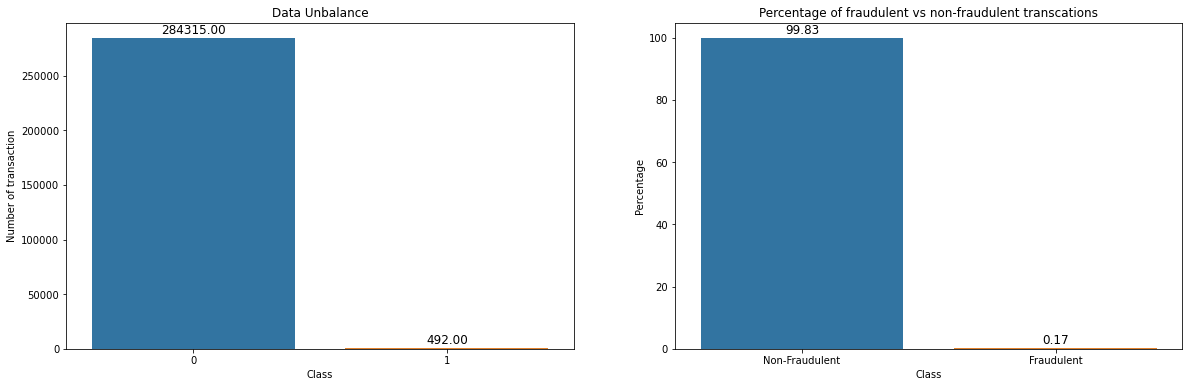

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
trans_plot = sns.countplot(df.Class)
for bar in trans_plot.patches:
    trans_plot.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Data Unbalance")


plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
perc_plot = sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for bar in perc_plot.patches:
    perc_plot.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

**Obeservation:**
It was mentioned in the problem statement that the dataset is highly imbalance and from the above plots we can verify the same.

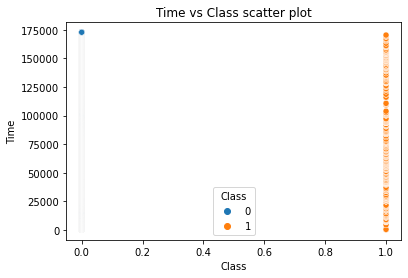

In [9]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot( df.Class, df.Time, hue=df.Class)
plt.title("Time vs Class scatter plot")
plt.show()

**Observation:**
Cannot tell much about the distribution of classes over time.

[]

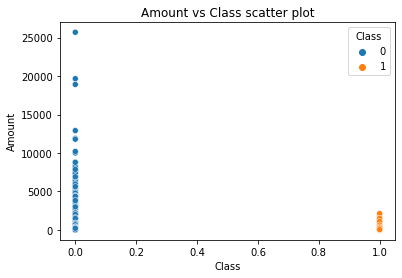

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df.Class, df.Amount, hue=df.Class)
plt.title("Amount vs Class scatter plot")
plt.plot()

**Observation:**
We can observe that only low amount loans are fraudulent, which is ideally more likely as well.

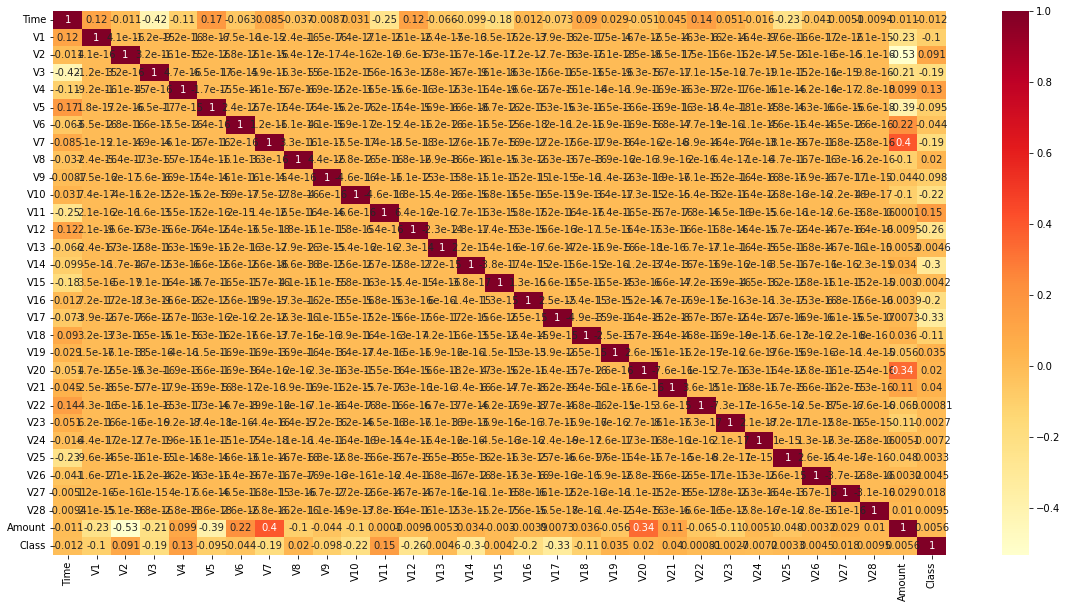

In [11]:
# Drop unnecessary columns

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap='YlOrRd', annot=True)
plt.show()

**Observation:**
We cannot observe any feature that has a high correlation, or even correlation > 0.5

Lets try to plot the distribution and observe

<Figure size 432x288 with 0 Axes>

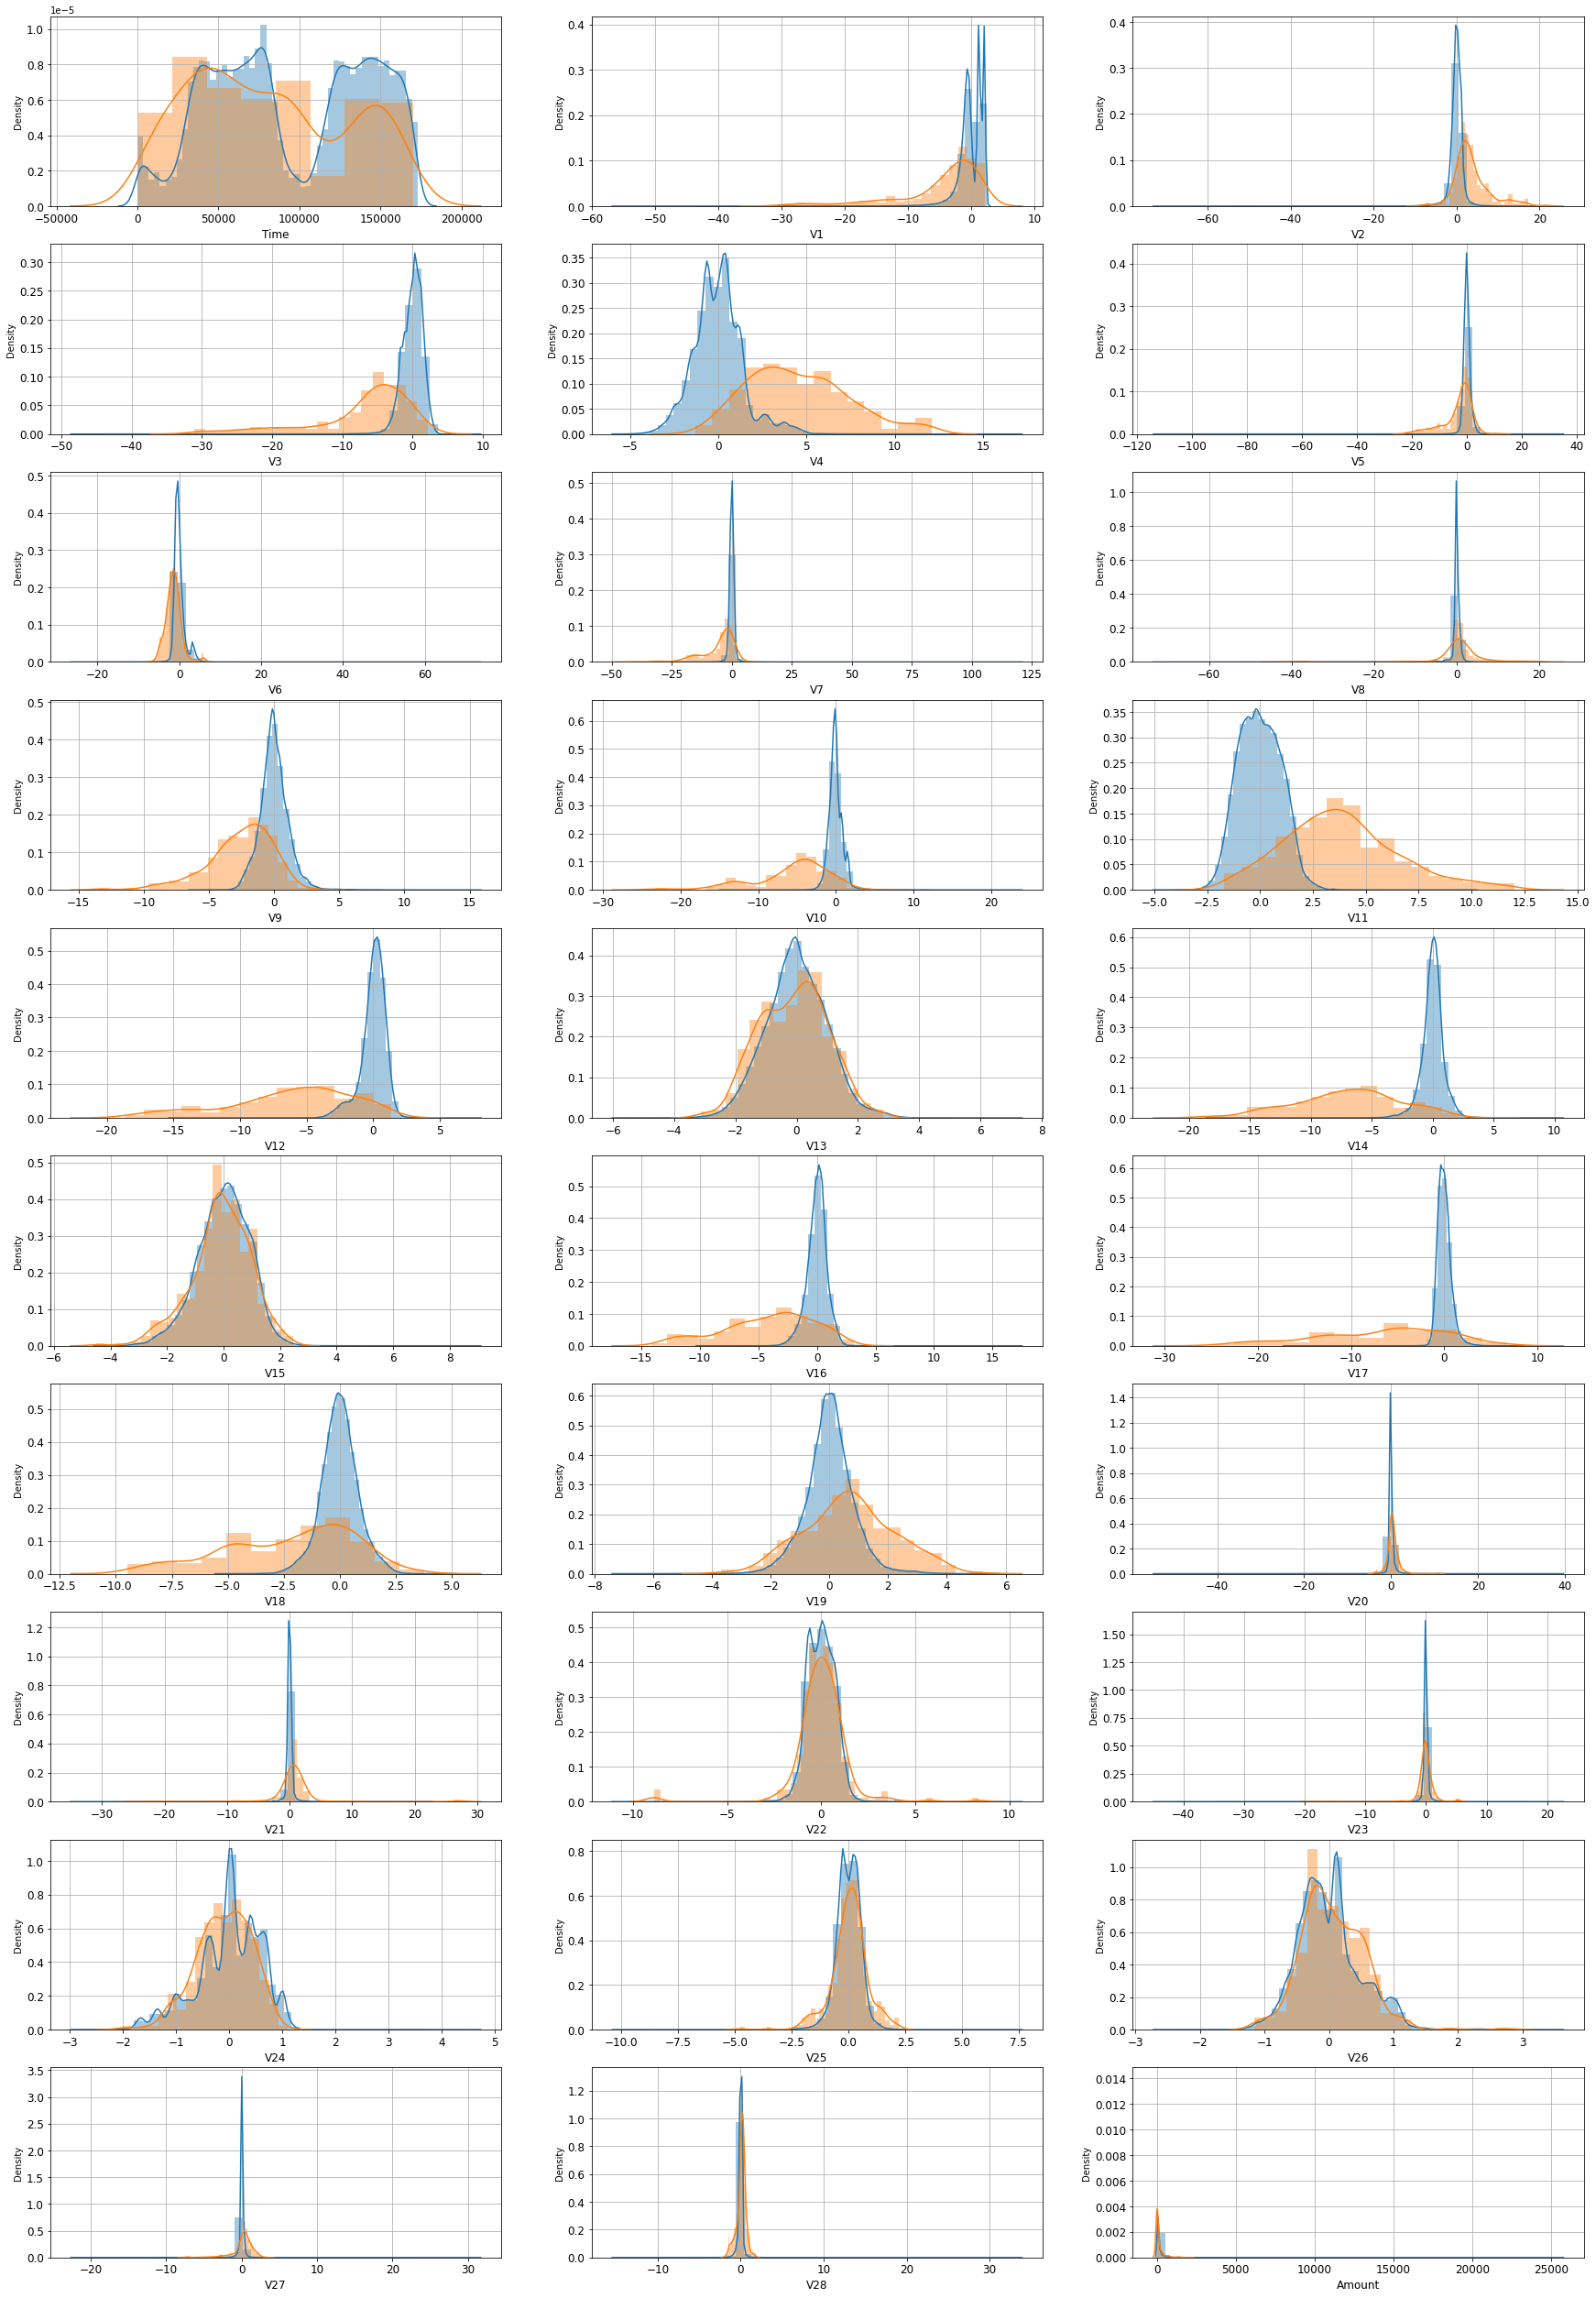

In [12]:
var = list(df.columns.values)
var.remove("Class")

i = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    plt.subplot(10,3,i)
    sns.distplot(t0[feature],label="0")
    sns.distplot(t1[feature],label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
    i+=1
plt.show()

**Observation**
1. All the plots are normally distributed but time. So we'll drop time feature since anyway it won't be of any help as we observed in the time scatter plot as well.
2. All the features are overlapping.

In [5]:
df.drop(columns=["Time"], inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [6]:
y= df.Class
X = df.drop(columns=["Class"], axis = 1)

y.shape,X.shape

((284807,), (284807, 29))

In [7]:
# Important libraries for model building, hyper-parameter tuning and validation

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

Since the dataset has just 284,807 rows, we'll create a 70:30 split. This will be helpful while training the test better and the model might not overfit as well.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [9]:
print("Total fraud count:",np.sum(y))
print("Fraud count in train:",np.sum(y_train))
print("Fraud count in test:",np.sum(y_test))

Total fraud count: 492
Fraud count in train: 344
Fraud count in test: 148


### Plotting the distribution of a variable

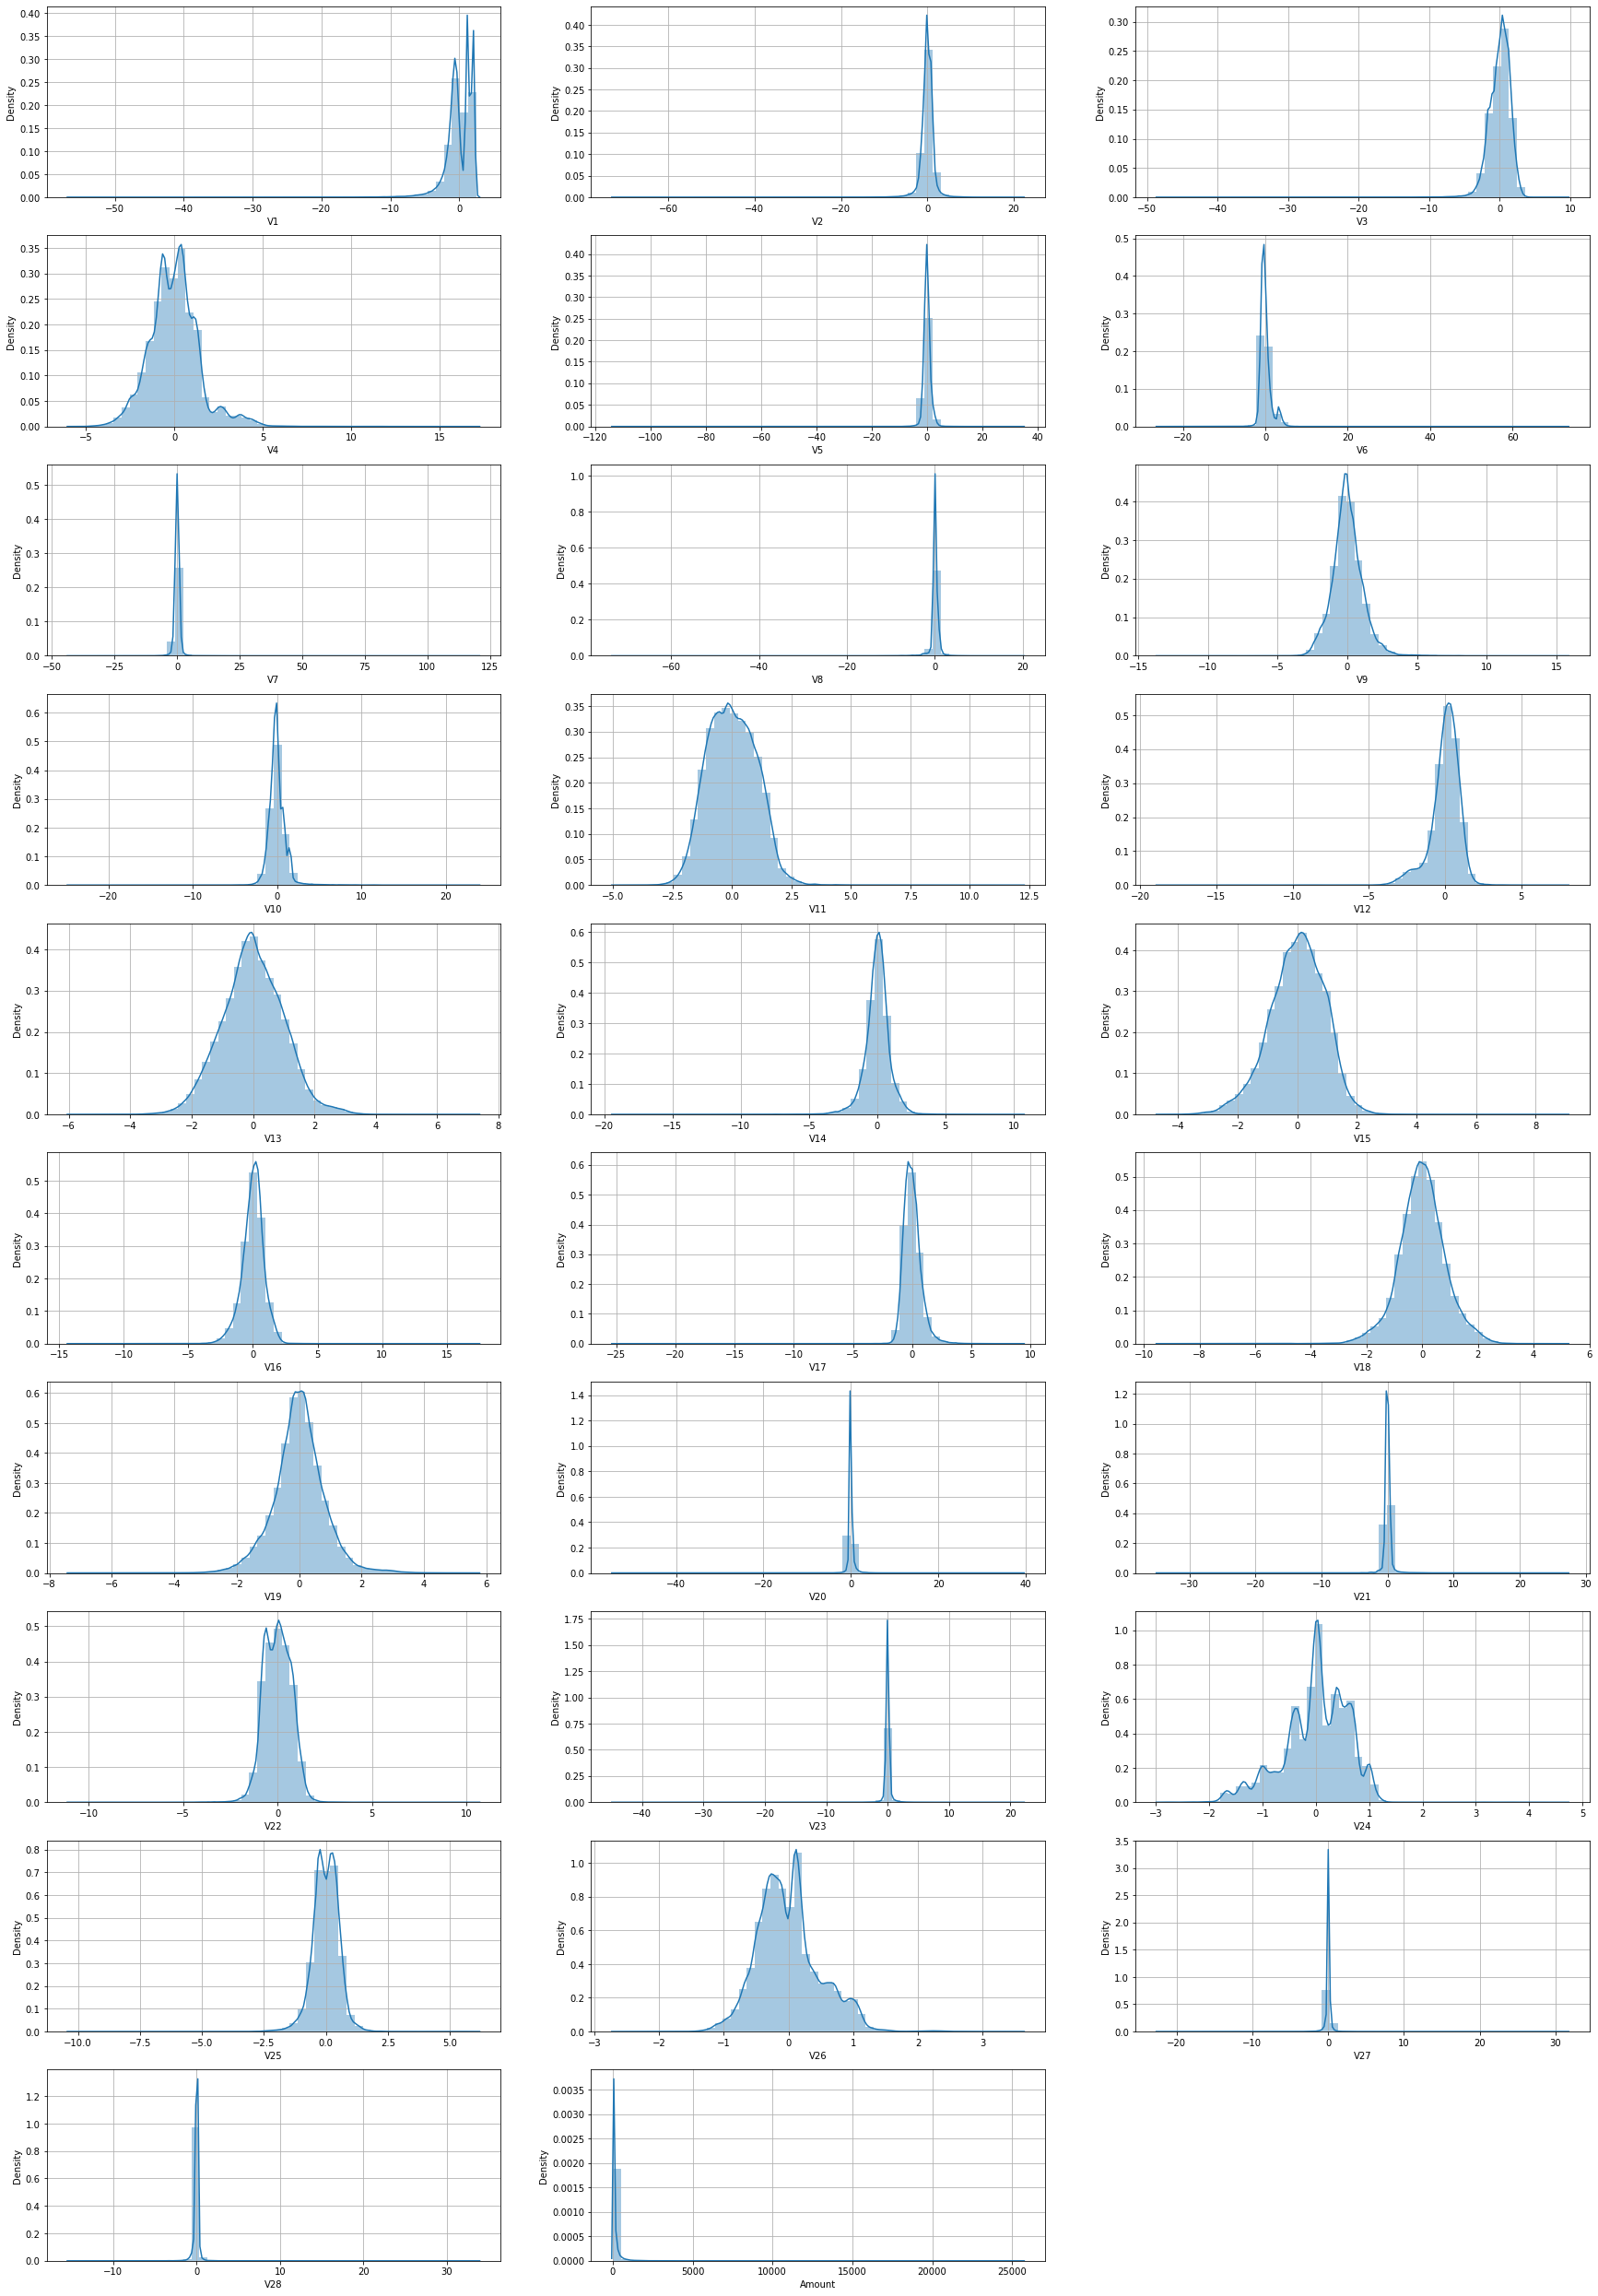

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(30,45))
i=1
for col in X_train.columns: 
    plt.subplot(10,3,i)
    sns.distplot(X_train[col])
    plt.grid()
    i+=1

plt.show()

**Observation:**
Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

**Prerequisites:**
* Before we perform any transformation, we need to normalise amount feature.
* Rest all features are already normalised since they were treated with PCA.

-- The Standard Scaler is not recommended as "Amount" feature is not normally distributed.

-- The Min-Max Scaler is also not recommended as there are noticeable outliers.

-- The Robust Scaler are robust to outliers, so we choose Robust Scaler.

In [10]:
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [11]:
df_cols_skew = pd.concat([pd.DataFrame(X_train.columns, columns=["Features"]), \
                 pd.DataFrame([X_train[i].skew() for i in X_train.columns], columns=["Skew"])], axis=1)
df_cols_skew.set_index("Features", inplace=True)
df_cols_skew

,Skew
Features,
V1,-3.350182
V2,-4.834316
V3,-2.322368
V4,0.698531
V5,-3.127732
V6,2.025515
V7,3.646023
V8,-8.851522
V9,0.546540


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [12]:
# Since there is skewness, we'll fix it by 1st filtering the features with skew more than 1 or less than -1

skewed = df_cols_skew.loc[(df_cols_skew["Skew"] > 1) | (df_cols_skew["Skew"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [13]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer()

X_train[skewed] = pt.fit_transform(X_train[skewed]) # Fitting the power transformer in train data

X_test[skewed] = pt.transform(X_test[skewed]) # Transforming the test data

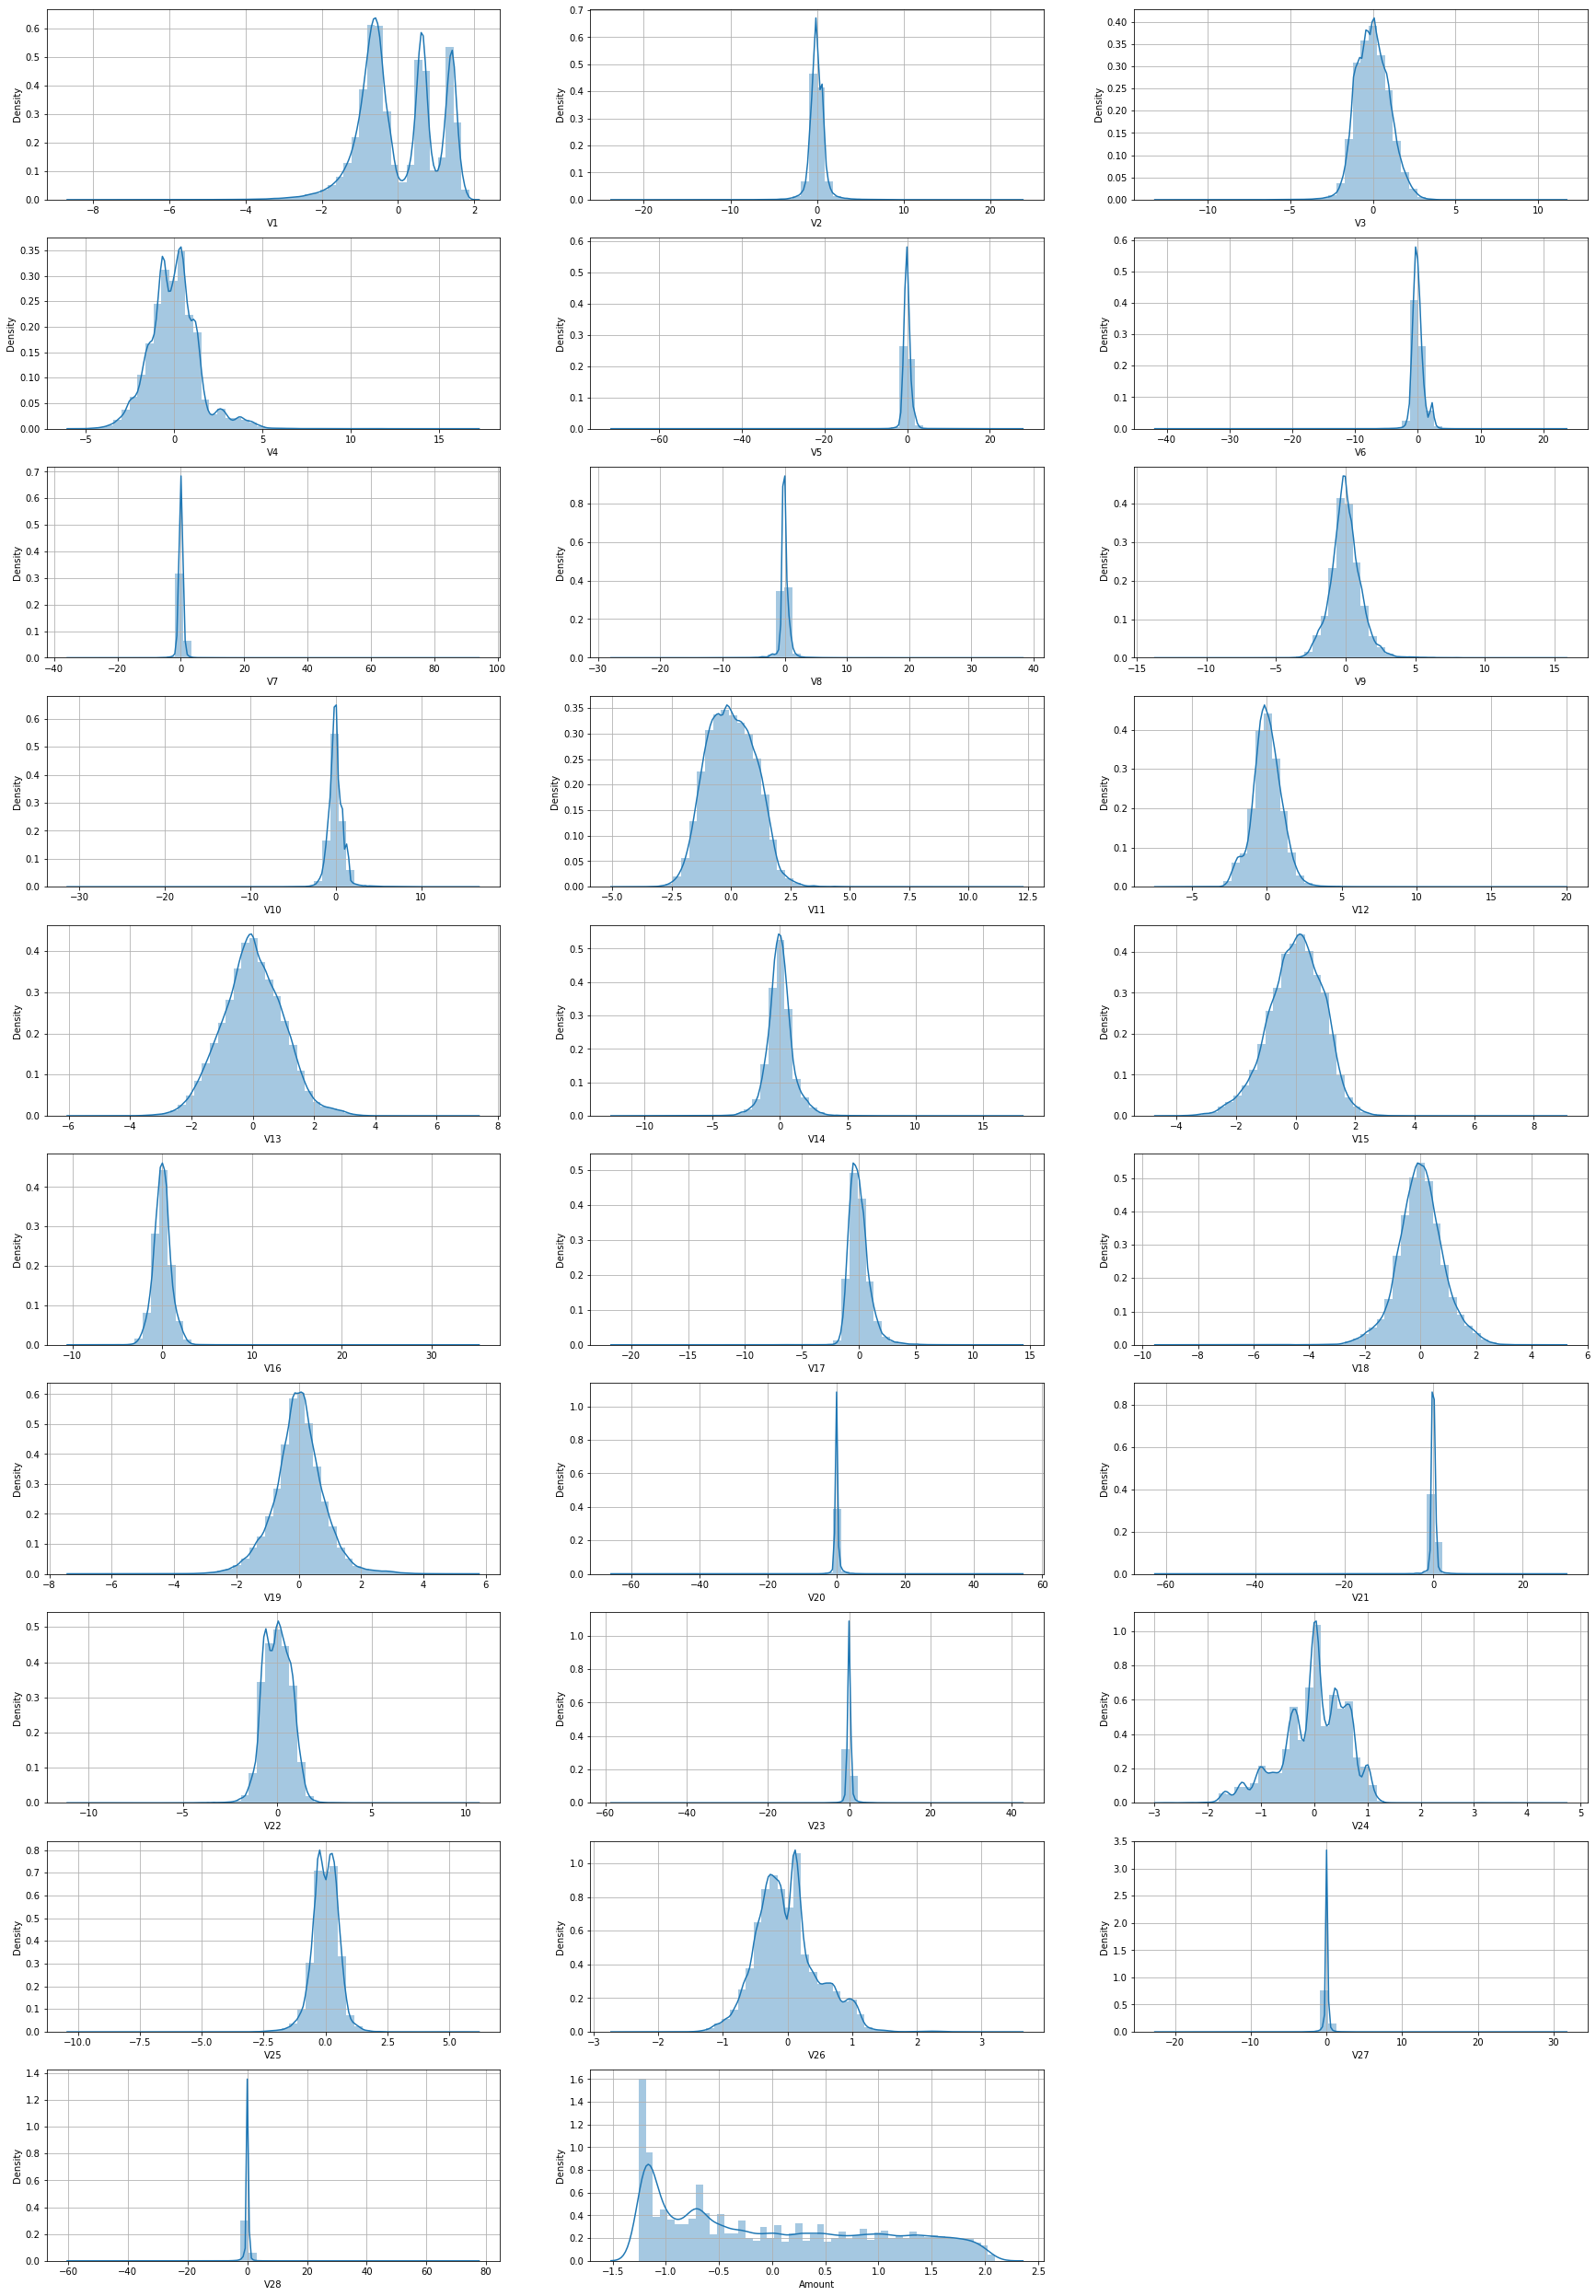

In [23]:
# plot the histogram of a variable from the dataset again to see the result

plt.figure(figsize=(30,45))
i=1
for col in X_train.columns:
    plt.subplot(10,3,i)
    sns.distplot(X_train[col])
    plt.grid()
    i+=1

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

**Functions for model validation**

In [14]:
def display_scores_train(model, y_train):
    y_pred = model.predict_proba(X_train)
    roc_auc = roc_auc_score(y_train, y_pred[:,1])
    print('ROC AUC Score:',roc_auc)
    print("\n")
    y_pred = model.predict(X_train)
    print(f"Classification Report: \n {classification_report(y_train, y_pred)}")

In [15]:
def display_scores_test(model, y_test):
    y_pred = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred[:,1])
    print('ROC AUC Score:',roc_auc)
    print("\n")
    y_pred = model.predict(X_test)
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

### Logistic Regression

In [27]:
%%time
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.05, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best ROC AUC score:  0.9851261548654648
Best hyperparameters:  {'C': 0.01}
CPU times: total: 2.25 s
Wall time: 15.5 s


In [28]:
# Instantiating the model with best estimator
log_reg_cv = model_cv.best_estimator_

# Fitting the model on train dataset
log_reg_cv.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [29]:
# Validation on Train
display_scores_train(log_reg_cv, y_train)

ROC AUC Score: 0.9871143603657924


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.62      0.74       344

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [30]:
# Validation on Test
display_scores_test(log_reg_cv, y_test)

ROC AUC Score: 0.9719187620705881


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



**Model Summary:**
* Train set
  * ROC : 98.7%
  * F1 Score for fraud class: 0.74
* Test set
  * ROC : 97.19%
  * F1 score for fraud class: 0.70

**Observations:**
1. ROC is good for both train and test.
2. F1 score also looks good for the fraudelent class.

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Decision Tree

**Parameter tuning**

##### Model 1

Tuning model on wide range of parameters.

In [31]:
%%time
params = {"criterion": ["gini", "entropy"], "max_depth": range(2,14,2), "min_samples_leaf": range(1000,20000,2500)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt.fit(X_train, y_train)

#print the evaluation result
print('Best ROC AUC score: ', model_cv_dt.best_score_)
print('Best hyperparameters: ', model_cv_dt.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best ROC AUC score:  0.9703599510607438
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1000}
CPU times: total: 9.77 s
Wall time: 4min 24s


**Observations:**
1. Since max_depth is 4, we'll try 2 to 6 as well.
2. We'll try min_samples_leaf less than in the range of 0 to 3500 as well, with step 100.
3. We'll take the criterion as `entropy`

##### Model 2

In [33]:
%%time
params = {"max_depth": [2,3,4,5,6], "min_samples_leaf": range(0,3501,100)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt_2 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42, criterion="entropy"),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt_2.fit(X_train, y_train)

#print the evaluation result
print('Best ROC AUC score: ', model_cv_dt_2.best_score_)
print('Best hyperparameters: ', model_cv_dt_2.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best ROC AUC score:  0.9720932231558258
Best hyperparameters:  {'max_depth': 6, 'min_samples_leaf': 600}
CPU times: total: 12.5 s
Wall time: 9min 48s


**Observations:**
* We have got our final parameters.
    1. max_depth is 6.
    2. min_samples_leaf is 600 itself.
    3. criterion as `entropy`.

In [38]:
# Instantiating the model with best params
dt_cv = model_cv_dt_2.best_estimator_

# Fitting the model on train dataset
dt_cv.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=600,
                       random_state=42)

In [39]:
# Validation on Train
display_scores_train(dt_cv, y_train)

ROC AUC Score: 0.9908677081653591


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.00      0.00      0.00       344

    accuracy                           1.00    199364
   macro avg       0.50      0.50      0.50    199364
weighted avg       1.00      1.00      1.00    199364



In [40]:
# Validation on Test
display_scores_test(dt_cv, y_test)

ROC AUC Score: 0.9514385685292538


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



**Model Summary:**
* Train set
  * ROC : 99.08%
  * F1 Score for fraud class: 0
* Test set
  * ROC : 95.14%
  * F1 Score for fraud class: 0

**Observations:**
1. ROC is good for both train and test.
2. However, F1 score is 0 for fraudelent class.

### Random Forest

**Parameter tuning**

Since Random Forest itself takes a lot of time and computation to run, we'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters.

##### Model 1

Tuning model on wide range of parameters.

In [37]:
%%time
params = {"criterion": ["gini", "entropy"], "n_estimators": range(0,600,200),
          "max_depth": range(2,15,2), "min_samples_leaf": range(0,20000,2500)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, bootstrap=True),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_rf.fit(X_train, y_train)

#print the evaluation result
print('Score for train: ', model_cv_rf.score(X_train, y_train))
print('Score for test: ', model_cv_rf.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_rf.best_score_)
print('Best hyperparameters: ', model_cv_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.9785156058290274
Score for test:  0.9590911035309887
Best ROC AUC score:  0.9772528348723641
Best hyperparameters:  {'n_estimators': 200, 'min_samples_leaf': 15000, 'max_depth': 10, 'criterion': 'entropy'}
CPU times: total: 1min 5s
Wall time: 11min 42s


**Observations:**
1. Since max_depth is 10, we'll try 8 to 12 while fine tuning.
2. min_samples_leaf is 15000, so we'll try it in the range of 14500 to 16500, with step 100.
3. We'll keep the criterion as `entropy`.
4. n_estimators is 200, so we'll fin tune it to in the range of 100 to 300 with step 10

##### Model 2

Fine tuning of parameters

In [41]:
%%time
params = {"n_estimators": range(100,300,10),
          "max_depth": [8,9,10,11,12], "min_samples_leaf": range(14500,16501,100)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf_2 = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, criterion='entropy', bootstrap=True),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 2,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_rf_2.fit(X_train, y_train)

#print the evaluation result
print('Score for train: ', model_cv_rf_2.score(X_train, y_train))
print('Score for test: ', model_cv_rf_2.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_rf_2.best_score_)
print('Best hyperparameters: ', model_cv_rf_2.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.979634832773614
Score for test:  0.9604007078771133
Best ROC AUC score:  0.9806313498995237
Best hyperparameters:  {'n_estimators': 100, 'min_samples_leaf': 16500, 'max_depth': 11}
CPU times: total: 31.2 s
Wall time: 9min 25s


**Observations:**
1. Now max_depth is 11 instead of 10.
2. min_samples_leaf is 16500.
3. n_estimators is 100.
4. We'll consider these parameters

**Observations:**
* We have got our final parameters, we need not to tune the model more.
    1. max_depth is 6.
    2. min_samples_leaf is 17700 itself.
    3. n_estimators is 180

In [42]:
# Instantiating the model with best params
rf_cv = RandomForestClassifier(random_state=42,
                               criterion='entropy',
                               bootstrap=True,
                               n_estimators=100,
                               min_samples_leaf=16500,
                               max_depth=11)

# Fitting the model on train dataset
rf_cv.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11,
                       min_samples_leaf=16500, random_state=42)

In [43]:
# Validation on Train
display_scores_train(rf_cv, y_train)

ROC AUC Score: 0.979634832773614


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.00      0.00      0.00       344

    accuracy                           1.00    199364
   macro avg       0.50      0.50      0.50    199364
weighted avg       1.00      1.00      1.00    199364



In [44]:
# Validation on Test
display_scores_test(rf_cv, y_test)

ROC AUC Score: 0.9604007078771133


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



**Model Summary:**
* Train set
  * ROC : 97.96%
  * F1 Score for fraud class: 0.0
* Test set
  * ROC : 96.04%
  * F1 score for fraud class: 0.0

**Observations:**
1. ROC is good for both train and test.
2. However, F1 score is  0 for fraudelent class.

### XG Boost

**Parameter tuning**

We'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters for XGBoost as well.

##### Model 1

Tuning model on fine parameters.

In [46]:
%%time
params = {"n_estimators": range(10,500,10), "max_depth": range(2,14,2),
          "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], "min_child_weight": [1, 3, 5, 7],
          "gamma": [0.0, 0.1, 0.2, 0.3, 0.4], "colsample_bytree": [0.3, 0.4, 0.5, 0.7]}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_xgb = RandomizedSearchCV(estimator = XGBClassifier(random_state=42, tree_method='gpu_hist'),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 


#perform hyperparameter tuning
model_cv_xgb.fit(X_train, y_train)

#print the evaluation result
print('Score for train: ', model_cv_xgb.score(X_train, y_train))
print('Score for test: ', model_cv_xgb.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_xgb.best_score_)
print('Best hyperparameters: ', model_cv_xgb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[15:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score for train:  0.9979951179383632
Score for test:  0.9730847076046092
Best ROC AUC score:  0.9830610790188947
Best hyperparameters:  {'n_estimators': 220, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.3}
CPU times: total: 5.38 s
Wall time: 1min 36s


**Observations:**
* We need not to fine tune the model more, as we already did fine tuned it.
* So we'll go with the below paramters itself:
    * `n_estimators`: 220
    * `min_child_weight`: 3
    * `max_depth`: 2
    * `learning_rate`: 0.1
    * `gamma`: 0.4
    * `colsample_bytree`: 0.3

In [47]:
# Instantiating the model with best params
xgb_cv = model_cv_xgb.best_estimator_

# Fitting the model on train dataset
xgb_cv.fit(X_train, y_train)

[15:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.4, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=220, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [48]:
# Validation on Train
display_scores_train(xgb_cv, y_train)

ROC AUC Score: 0.9979951179383632


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.94      0.83      0.88       344

    accuracy                           1.00    199364
   macro avg       0.97      0.91      0.94    199364
weighted avg       1.00      1.00      1.00    199364



In [49]:
# Validation on Test
display_scores_test(xgb_cv, y_test)

ROC AUC Score: 0.9730847076046092


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.73      0.81       148

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



**Model Summary:**
* Train set
  * ROC : 99.79%
  * F1 Score for fraud class: 0.88
* Test set
  * ROC : 97.31%
  * F1 score for fraud class: 0.81

**Observations:**
1. ROC is `best` as far as we have seen till now in both train and test.
2. And F1 score is `0.88 for train and 0.81 in test` for fraudelent class, which is the `best` till now.

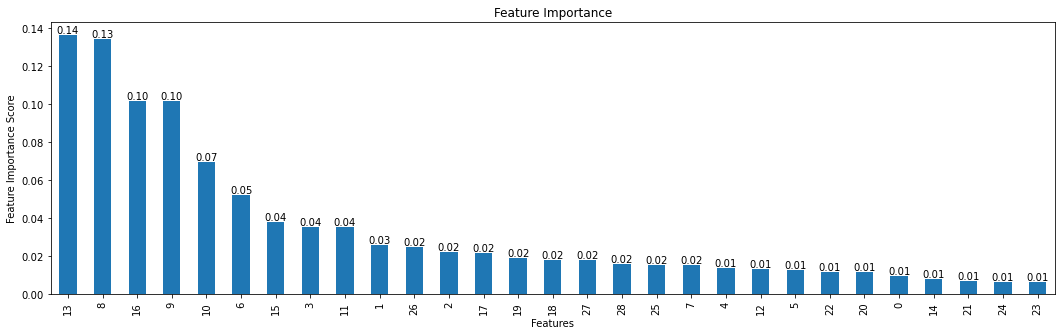

In [50]:
plt.figure(figsize=(18,5))
feat_imp = pd.Series(xgb_cv.feature_importances_).sort_values(ascending=False)
f_imp = feat_imp.plot(kind='bar', title='Feature Importance')
for bar in f_imp.patches:
    f_imp.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=10, xytext=(0, 5), textcoords='offset points')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.show()

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 13
2nd Top var = 8
3rd Top var = 16


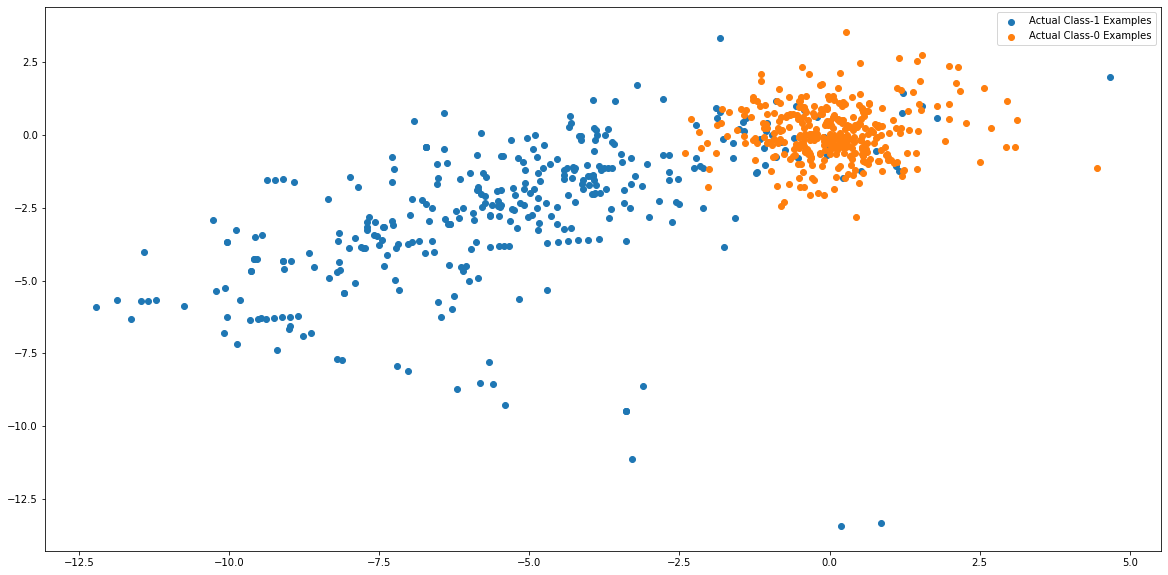

In [52]:
var_imp = []
for i in xgb_cv.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_cv.feature_importances_)[-1]))
print('2nd Top var =', var_imp.index(np.sort(xgb_cv.feature_importances_)[-2]))
print('3rd Top var =', var_imp.index(np.sort(xgb_cv.feature_importances_)[-3]))

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_cv.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_cv.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

**Validation for models after balancing**

In [25]:
def display_scores_train_bal(model, X_train, y_train):
    y_pred = model.predict_proba(X_train)
    roc_auc = roc_auc_score(y_train, y_pred[:,1])
    print('ROC AUC Score:',roc_auc)
    print("\n")
    y_pred = model.predict(X_train)
    print(f"Classification Report: \n {classification_report(y_train, y_pred)}")

In [26]:
def display_scores_test_bal(model, X_test, y_test):
    y_pred = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred[:,1])
    print('ROC AUC Score:',roc_auc)
    print("\n")
    y_pred = model.predict(X_test)
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

### Random Oversampling

In [23]:
from imblearn.over_sampling import RandomOverSampler #- import the packages

In [24]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_test_ros, y_test_ros = ros.fit_resample(X_test, y_test)

### Logistic Regression

In [18]:
%%time

params = {"C": [0.01, 0.05, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_log_ros = GridSearchCV(estimator = LogisticRegression(random_state=42),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_log_ros.fit(X_train_ros, y_train_ros)

#print the evaluation result
print('Score for train: ', model_cv_log_ros.score(X_train_ros, y_train_ros))
print('Score for test: ', model_cv_log_ros.score(X_test_ros, y_test_ros))
print('Best ROC AUC score: ', model_cv_log_ros.best_score_)
print('Best hyperparameters: ', model_cv_log_ros.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Score for train:  0.9901585275133856
Score for test:  0.9709073279857031
Best ROC AUC score:  0.9901491560039029
Best hyperparameters:  {'C': 100}
CPU times: total: 8 s
Wall time: 58.3 s


In [19]:
# Instantiating the model with best estimator
log_reg_cv_ros = model_cv_log_ros.best_estimator_

# Fitting the model on train dataset
log_reg_cv_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(C=100, random_state=42)

In [28]:
# Validation on Train
display_scores_train_bal(log_reg_cv_ros, X_train_ros, y_train_ros)

ROC AUC Score: 0.9900007041083563


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.93      0.95    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



In [29]:
# Validation on Test
display_scores_test_bal(log_reg_cv_ros, X_test_ros, y_test_ros)

ROC AUC Score: 0.9716110623213681


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     85295
           1       0.97      0.88      0.93     85295

    accuracy                           0.93    170590
   macro avg       0.93      0.93      0.93    170590
weighted avg       0.93      0.93      0.93    170590



**Model Summary:**
* Train set
  * ROC : 99.00%
  * F1 Score for fraud class: 0.95
* Test set
  * ROC : 97.16%
  * F1 score for fraud class: 0.93

**Observations:**
1. ROC is good for both train and test.
2. F1 score is also good.
3. All the results are better when compared to non-balanced results.

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Decision Tree

**Parameter tuning**

##### Model 1

Tuning model on wide range of parameters.

In [59]:
%%time
params = {"criterion": ["gini", "entropy"], "max_depth": range(2,15,2), "min_samples_leaf": range(0,20001,2500)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt_ros = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt_ros.fit(X_train_ros, y_train_ros)

#print the evaluation result
print('Score for train: ', model_cv_dt_ros.score(X_train_ros, y_train_ros))
print('Score for test: ', model_cv_dt_ros.score(X_test_ros, y_test_ros))
print('Best ROC AUC score: ', model_cv_dt_ros.best_score_)
print('Best hyperparameters: ', model_cv_dt_ros.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Score for train:  0.9971609909635497
Score for test:  0.9460332819483414
Best ROC AUC score:  0.9961814745469966
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2500}
CPU times: total: 11 s
Wall time: 9min 22s


**Observations:**
1. Since max_depth is 8, we'll try 5 to 11 next.
2. We'll try min_samples_leaf less than in the range of 0 to 5000 as well, with step 250.
3. We'll take criterion as gini

##### Model 2

In [64]:
%%time
params = {"max_depth": range(5,12), "min_samples_leaf": range(0,5001,250)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt_ros_2 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42, criterion="gini"),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt_ros_2.fit(X_train_ros, y_train_ros)

#print the evaluation result
print('Score for train: ', model_cv_dt_ros_2.score(X_train_ros, y_train_ros))
print('Score for test: ', model_cv_dt_ros_2.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_dt_ros_2.best_score_)
print('Best hyperparameters: ', model_cv_dt_ros_2.best_params_)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Score for train:  0.9996534855658569
Score for test:  0.917327185618117
Best ROC AUC score:  0.9995356347258649
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 250}
CPU times: total: 13 s
Wall time: 14min 33s


**Observations:**
* We have got our final parameters.
    1. max_depth is 14.
    2. min_samples_leaf is 100.
    3. criterion as `gini`.

In [30]:
# Instantiating the model with best params
dt_cv_ros = DecisionTreeClassifier(random_state=42,
                                   criterion="gini",
                                   max_depth=14,
                                   min_samples_leaf=100)

# Fitting the model on train dataset
dt_cv_ros.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=100, random_state=42)

In [33]:
# Validation on Train
display_scores_train_bal(dt_cv_ros, X_train_ros, y_train_ros)

ROC AUC Score: 0.9998768592522818


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [34]:
# Validation on Test
display_scores_test_bal(dt_cv_ros, X_test_ros, y_test_ros)

ROC AUC Score: 0.9054938153028766


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     85295
           1       0.99      0.81      0.89     85295

    accuracy                           0.90    170590
   macro avg       0.92      0.90      0.90    170590
weighted avg       0.92      0.90      0.90    170590



**Model Summary:**
* Train set
  * ROC : 99.98%
  * F1 Score for fraud class: 1.0
* Test set
  * ROC : 90.54%
  * F1 Score for fraud class: 0.89

**Observations:**
1. ROC is good for both train and test.
2. F1 score is also better when compared to before.

### Random Forest

**Parameter tuning**

Since Random Forest itself takes a lot of time and computation to run, we'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters.

##### Model 1

Tuning model on wide range of parameters.

In [28]:
%%time
params = {"criterion": ["gini", "entropy"], "n_estimators": range(0,601,200),
          "max_depth": range(2,15,2), "min_samples_leaf": range(0,20001,5000)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf_ros = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, bootstrap=True),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_rf_ros.fit(X_train_ros, y_train_ros)

#print the evaluation result
print('Score for train: ', model_cv_rf_ros.score(X_train_ros, y_train_ros))
print('Score for test: ', model_cv_rf_ros.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_rf_ros.best_score_)
print('Best hyperparameters: ', model_cv_rf_ros.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.9966213399784155
Score for test:  0.97285462377789
Best ROC AUC score:  0.9955343258801607
Best hyperparameters:  {'n_estimators': 200, 'min_samples_leaf': 5000, 'max_depth': 10, 'criterion': 'entropy'}
CPU times: total: 2min 33s
Wall time: 44min 8s


**Observations:**
1. Since max_depth is 10, we'll try 8 to 12 while fine tuning while changing other parameters as well.
2. min_samples_leaf is 5000, so we'll try it in the range of 0 to 10000, with step 500.
3. We'll keep the criterion as `entorpy`.
4. n_estimators is 200 and we'll try to tune it more.

##### Model 2

Fine tuning of parameters

In [29]:
%%time
params = {'n_estimators': range(100,301,50), "max_depth": [8,9,10,11,12], "min_samples_leaf": range(0,10001,500)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf_ros_2 = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, criterion='entropy', bootstrap=True),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_rf_ros_2.fit(X_train_ros, y_train_ros)

#print the evaluation result
print('Score for train: ', model_cv_rf_ros_2.score(X_train_ros, y_train_ros))
print('Score for test: ', model_cv_rf_ros_2.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_rf_ros_2.best_score_)
print('Best hyperparameters: ', model_cv_rf_ros_2.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.9982197743821623
Score for test:  0.9731561211249353
Best ROC AUC score:  0.9975234089341549
Best hyperparameters:  {'n_estimators': 250, 'min_samples_leaf': 3000, 'max_depth': 9}
CPU times: total: 3min 28s
Wall time: 41min 14s


**Observations:**
* We have got our final parameters, we need not to tune the model more.
    1. `max_depth` is 9.
    2. `min_samples_leaf` is 3000 itself.
    3. `n_estimators` is 250
    4. `criterion` is entropy

In [35]:
# Instantiating the model with best params
rf_cv_ros = RandomForestClassifier(random_state=42,
                                   criterion='entropy',
                                   bootstrap=True,
                                   n_estimators=250,
                                   min_samples_leaf=3000,
                                   max_depth=9,
                                   n_jobs=-1)

# Fitting the model on train dataset
rf_cv_ros.fit(X_train_ros, y_train_ros)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3000,
                       n_estimators=250, n_jobs=-1, random_state=42)

In [36]:
# Validation on Train
display_scores_train_bal(rf_cv_ros, X_train_ros, y_train_ros)

ROC AUC Score: 0.9981749369266455


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97    199020
           1       0.99      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.97      0.96      0.96    398040
weighted avg       0.97      0.96      0.96    398040



In [37]:
# Validation on Test
display_scores_test_bal(rf_cv_ros, X_test_ros, y_test_ros)

ROC AUC Score: 0.97431412428793


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     85295
           1       0.99      0.84      0.91     85295

    accuracy                           0.92    170590
   macro avg       0.93      0.92      0.92    170590
weighted avg       0.93      0.92      0.92    170590



**Model Summary:**
* Train set
  * ROC : 99.82%
  * F1 Score for fraud class: 0.96
* Test set
  * ROC : 97.43%
  * F1 score for fraud class: 0.91

**Observations:**
1. ROC is good for both train and test.
2. F1 score is better than before.

### XG Boost

**Parameter tuning**

We'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters for XGBoost as well.

##### Model 1

Tuning model on fine parameters.

In [147]:
%%time
params = {"n_estimators": range(10,500,10), "max_depth": range(2,14,2),
          "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], "min_child_weight": [1, 3, 5, 7],
          "gamma": [0.0, 0.1, 0.2, 0.3, 0.4], "colsample_bytree": [0.3, 0.4, 0.5, 0.7]}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_xgb_ros = RandomizedSearchCV(estimator = XGBClassifier(random_state=42, verbose=2),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 2,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_xgb_ros.fit(X_train_ros, y_train_ros)

#print the evaluation result
print('Score for train: ', model_cv_xgb_ros.score(X_train_ros, y_train_ros))
print('Score for test: ', model_cv_xgb_ros.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_xgb_ros.best_score_)
print('Best hyperparameters: ', model_cv_xgb_ros.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[15:36:30] WARNING: ../src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Score for train:  1.0
Score for test:  0.9823470679774443
Best ROC AUC score:  0.9999981770838644
Best hyperparameters:  {'n_estimators': 210, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.3}
CPU times: user 8min 22s, sys: 3.69 s, total: 8min 26s
Wall time: 18min 17s


**Observations:**
* We need not to fine tune the model more, as we already did fine tuned it.
* So we'll go with the below paramters itself:
    * `n_estimators`: 210
    * `min_child_weight`: 1
    * `max_depth`: 12
    * `learning_rate`: 0.1
    * `gamma`: 0.4
    * `colsample_bytree`: 0.3

In [38]:
# Instantiating the model with best params
xgb_cv_ros = XGBClassifier(random_state=42, n_estimators=210, min_child_weight=5,
                           max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.3)

# Fitting the model on train dataset
xgb_cv_ros.fit(X_train_ros, y_train_ros)

[21:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=210, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
# Validation on Train
display_scores_train_bal(xgb_cv_ros, X_train_ros, y_train_ros)

ROC AUC Score: 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [41]:
# Validation on Test
display_scores_test_bal(xgb_cv_ros, X_test_ros, y_test_ros)

ROC AUC Score: 0.9737352041805125


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     85295
           1       1.00      0.80      0.89     85295

    accuracy                           0.90    170590
   macro avg       0.92      0.90      0.90    170590
weighted avg       0.92      0.90      0.90    170590



**Model Summary:**
* Train set
  * ROC : 100%
  * F1 Score for fraud class: 1.00
* Test set
  * ROC : 97.37%
  * F1 score for fraud class: 0.89

**Observations:**
1. Both ROC and F1 has improved.
2. However, there is a drastic lift in train than we see in test.

### Print the class distribution after applying SMOTE 

##### Build models on other algorithms to see the better performing on SMOTE

In [42]:
from imblearn.over_sampling import SMOTE #- import the packages

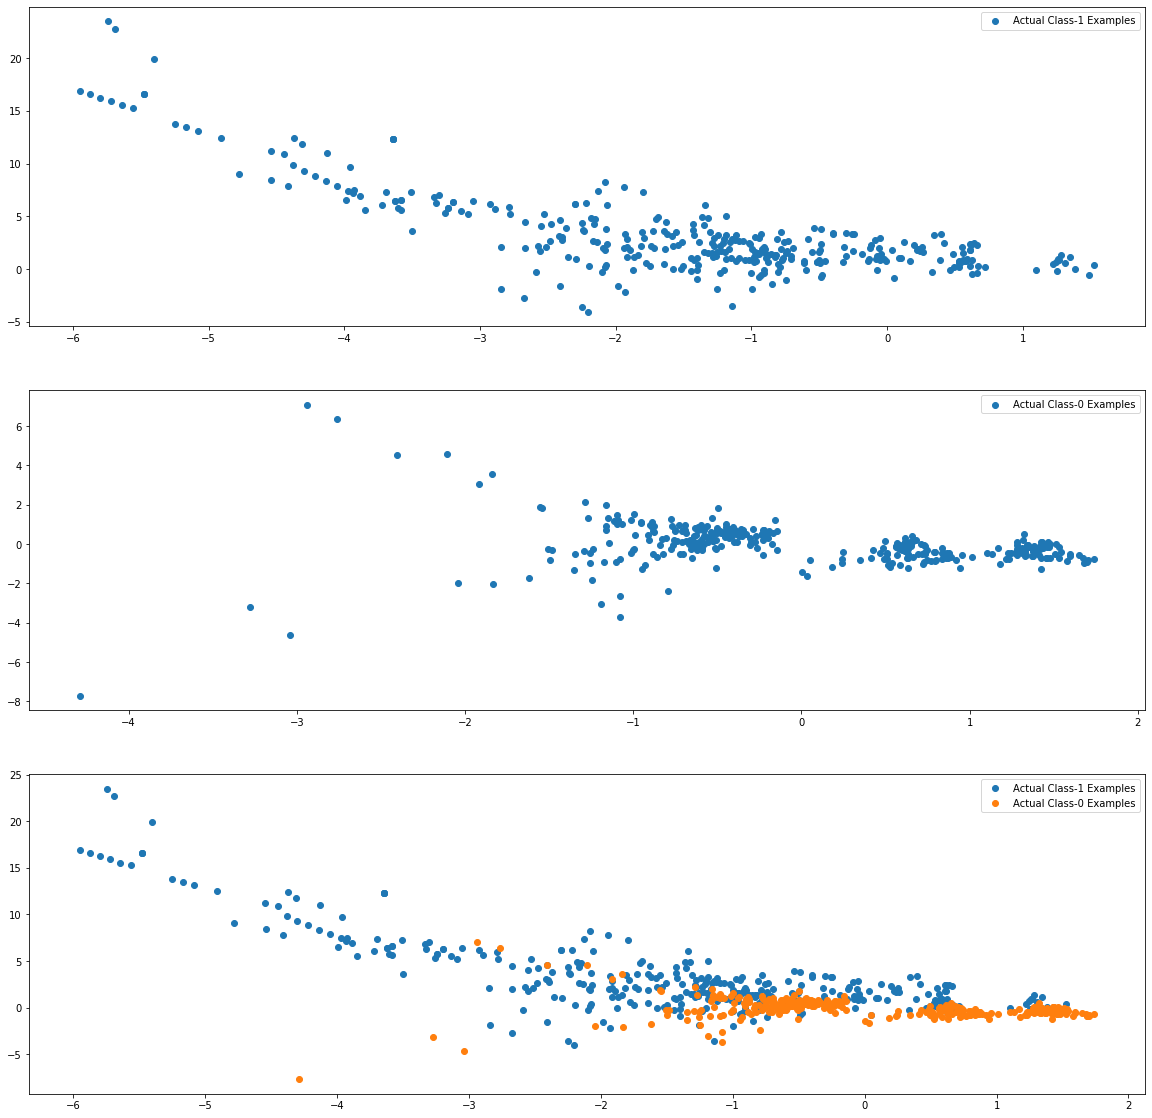

In [43]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

### Logistic Regression

In [ ]:
%%time

params = {"C": [0.01, 0.05, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_log_sm = GridSearchCV(estimator = LogisticRegression(random_state=42),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_log_sm.fit(X_train_smote, y_train_smote)

#print the evaluation result
print('Score for train: ', model_cv_log_sm.score(X_train_smote, y_train_smote))
print('Score for test: ', model_cv_log_sm.score(X_test_smote, y_test_smote))
print('Best ROC AUC score: ', model_cv_log_sm.best_score_)
print('Best hyperparameters: ', model_cv_log_sm.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Score for train:  0.9915989624913255
Score for test:  0.9708522640195355
Best ROC AUC score:  0.9915867153741627
Best hyperparameters:  {'C': 100}
CPU times: total: 9.25 s
Wall time: 1min 56s


In [51]:
# Instantiating the model with best estimator
log_reg_cv_sm = model_cv_log_sm.best_estimator_

# Fitting the model on train dataset
log_reg_cv_sm.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100, random_state=42)

In [52]:
# Validation on Train
display_scores_train_bal(log_reg_cv_sm, X_train_smote, y_train_smote)

ROC AUC Score: 0.9915944701239874


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.97      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



In [53]:
# Validation on Test
display_scores_test_bal(log_reg_cv_sm, X_test_smote, y_test_smote)

ROC AUC Score: 0.9708481622287765


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     85295
           1       0.97      0.86      0.91     85295

    accuracy                           0.92    170590
   macro avg       0.92      0.92      0.92    170590
weighted avg       0.92      0.92      0.92    170590



**Model Summary:**
* Train set
  * ROC : 99.15%
  * F1 Score for fraud class: 0.96
* Test set
  * ROC : 97.08%
  * F1 score for fraud class: 0.91

**Observations:**
1. ROC is good for both train and test.
2. F1 score is also good.
3. All the results are better when compared to non-balanced results, but test results have dropped when compared to random oversampling, however they have not dropped much just a little.

### Decision Tree

**Parameter tuning**

##### Model 1

Tuning model on wide range of parameters.

In [41]:
%%time
params = {"criterion": ["gini", "entropy"], "max_depth": range(2,15,2), "min_samples_leaf": range(0,20001,2500)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt_sm = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt_sm.fit(X_train_smote, y_train_smote)

#print the evaluation result
print('Score for train: ', model_cv_dt_sm.score(X_train_smote, y_train_smote))
print('Score for test: ', model_cv_dt_sm.score(X_test_smote, y_test_smote))
print('Best ROC AUC score: ', model_cv_dt_sm.best_score_)
print('Best hyperparameters: ', model_cv_dt_sm.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Score for train:  0.9948319532642922
Score for test:  0.95765039616086
Best ROC AUC score:  0.9938964231430134
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2500}
CPU times: total: 23.9 s
Wall time: 16min


**Observations:**
1. Since max_depth is 10, we'll try 7 to 13 next.
2. We'll try min_samples_leaf less than in the range of 0 to 5000 as well, with step 150.
3. We'll take criterion as entropy

##### Model 2

In [43]:
%%time
params = {"max_depth": range(7,14), "min_samples_leaf": range(0,5001,150)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt_sm_2 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42, criterion="entropy"),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt_sm_2.fit(X_train_smote, y_train_smote)
`
#print the evaluation result
print('Score for train: ', model_cv_dt_sm_2.score(X_train_smote, y_train_smote))
print('Score for test: ', model_cv_dt_sm_2.score(X_test_smote, y_test_smote))
print('Best ROC AUC score: ', model_cv_dt_sm_2.best_score_)
print('Best hyperparameters: ', model_cv_dt_sm_2.best_params_)

Fitting 5 folds for each of 238 candidates, totalling 1190 fits
Score for train:  0.9995402601124568
Score for test:  0.9310523255537617
Best ROC AUC score:  0.9990570714863303
Best hyperparameters:  {'max_depth': 13, 'min_samples_leaf': 150}
CPU times: total: 20.7 s
Wall time: 56min 34s


**Observations:**
* We have got our final parameters.
    1. max_depth is 14.
    2. min_samples_leaf is 100.
    3. criterion as `entorpy`.

In [47]:
# Instantiating the model with best params
dt_cv_sm = DecisionTreeClassifier(random_state=42,
                                  criterion="entropy",
                                  max_depth=14,
                                  min_samples_leaf=100)

# Fitting the model on train dataset
dt_cv_sm.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=100,
                       random_state=42)

In [48]:
# Validation on Train
display_scores_train_bal(dt_cv_sm, X_train_smote, y_train_smote)

ROC AUC Score: 0.9997035414239248


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    199020
           1       0.99      0.99      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



In [50]:
# Validation on Test
display_scores_test_bal(dt_cv_sm, X_test_smote, y_test_smote)

ROC AUC Score: 0.9269938939205902


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     85295
           1       0.99      0.84      0.91     85295

    accuracy                           0.91    170590
   macro avg       0.92      0.91      0.91    170590
weighted avg       0.92      0.91      0.91    170590



**Model Summary:**
* Train set
  * ROC : 99.97%
  * F1 Score for fraud class: 0.99
* Test set
  * ROC : 92.70%
  * F1 Score for fraud class: 0.91

**Observations:**
1. Both ROC and F1 score are good.
2. ROC and F1 for test are better than random oversampling.

### Random Forest

**Parameter tuning**

Since Random Forest itself takes a lot of time and computation to run, we'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters.

##### Model 1

Tuning model on wide range of parameters.

In [47]:
%%time
params = {"criterion": ["gini", "entropy"], "n_estimators": range(0,600,200),
          "max_depth": range(2,14,2), "min_samples_leaf": range(0,20000,5000)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf_sm = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, bootstrap=True),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_rf_sm.fit(X_train_smote, y_train_smote)

#print the evaluation result
print('Score for train: ', model_cv_rf_sm.score(X_train_smote, y_train_smote))
print('Score for test: ', model_cv_rf_sm.score(X_test_smote, y_test_smote))
print('Best ROC AUC score: ', model_cv_rf_sm.best_score_)
print('Best hyperparameters: ', model_cv_rf_sm.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.9933896420063577
Score for test:  0.9684463935182032
Best ROC AUC score:  0.9925474672104604
Best hyperparameters:  {'n_estimators': 400, 'min_samples_leaf': 5000, 'max_depth': 6, 'criterion': 'entropy'}
CPU times: total: 7min 51s
Wall time: 32min


**Observations:**
1. Since max_depth is 6, we'll try 5 and 7 as well while fine tuning while changing other parameters as well.
2. min_samples_leaf is 5000, so we'll try it in the range of 0 to 10000, with step 1000.
3. We'll keep the criterion as `entropy`.
4. n_estimators is 400, we'll try 300 to 500 with 50 steps.

##### Model 2

Fine tuning of parameters

In [18]:
%%time
params = {"n_estimators": range(300,501,100),
          "max_depth": range(5,8), "min_samples_leaf": range(2500,7501,500)}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf_sm_2 = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, criterion='entropy'),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True)

#perform hyperparameter tuning
model_cv_rf_sm_2.fit(X_train_smote, y_train_smote)

#print the evaluation result
print('Score for train: ', model_cv_rf_sm_2.score(X_train_smote, y_train_smote))
print('Score for test: ', model_cv_rf_sm_2.score(X_test_smote, y_test_smote))
print('Best ROC AUC score: ', model_cv_rf_sm_2.best_score_)
print('Best hyperparameters: ', model_cv_rf_sm_2.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.9951442405188701
Score for test:  0.9693943753237967
Best ROC AUC score:  0.9944118365089022
Best hyperparameters:  {'n_estimators': 500, 'min_samples_leaf': 3500, 'max_depth': 7}
CPU times: total: 10min 53s
Wall time: 1h 54min 39s


**Observations:**
* We have got our final parameters, we need not to tune the model more.
    1. `max_depth` is 14.
    2. `min_samples_leaf` is 10700 itself.
    3. `n_estimators` is 100
    4. `criterion` is gini

In [54]:
# Instantiating the model with best params
rf_cv_sm = RandomForestClassifier(random_state=42,
                                   criterion='entropy',
                                   bootstrap=True,
                                   n_estimators=500,
                                   min_samples_leaf=3500,
                                   max_depth=7,
                                   n_jobs=-1)

# Fitting the model on train dataset
rf_cv_sm.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3500,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [55]:
# Validation on Train
display_scores_train_bal(rf_cv_sm, X_train_smote, y_train_smote)

ROC AUC Score: 0.9951442405188701


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96    199020
           1       0.99      0.92      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.96      0.95      0.95    398040
weighted avg       0.96      0.95      0.95    398040



In [56]:
# Validation on Test
display_scores_test_bal(rf_cv_sm, X_test_smote, y_test_smote)

ROC AUC Score: 0.9698840514409219


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     85295
           1       0.99      0.84      0.91     85295

    accuracy                           0.92    170590
   macro avg       0.93      0.92      0.92    170590
weighted avg       0.93      0.92      0.92    170590



**Model Summary:**
* Train set
  * ROC : 99.51%
  * F1 Score for fraud class: 0.95
* Test set
  * ROC : 96.99%
  * F1 score for fraud class: 0.91

**Observations:**
1. Results are quite similar to what we got in random oversampling.

### XG Boost

**Parameter tuning**

We'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters for XGBoost as well.

##### Model 1

Tuning model on fine parameters.

In [28]:
%%time
params = {"n_estimators": range(10,500,10), "max_depth": range(2,15),
          "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], "min_child_weight": [1, 3, 5, 7],
          "gamma": [0.0, 0.1, 0.2, 0.3, 0.4], "colsample_bytree": [0.3, 0.4, 0.5, 0.7]}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_xgb_sm = RandomizedSearchCV(estimator = XGBClassifier(random_state=42, tree_method='gpu_hist'),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_xgb_sm.fit(X_train_smote, y_train_smote)

#print the evaluation result
print('Score for train: ', model_cv_xgb_sm.score(X_train_smote, y_train_smote))
print('Score for test: ', model_cv_xgb_sm.score(X_test_smote, y_test_smote))
print('Best ROC AUC score: ', model_cv_xgb_sm.best_score_)
print('Best hyperparameters: ', model_cv_xgb_sm.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[21:26:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score for train:  0.999999999596051
Score for test:  0.9754733571721672
Best ROC AUC score:  0.9999924787746017
Best hyperparameters:  {'n_estimators': 460, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.4}
CPU times: total: 14.8 s
Wall time: 3min 51s


**Observations:**
* We need not to fine tune the model more, as we already did fine tuned it.
* So we'll go with the below paramters itself:
    * `n_estimators`: 460
    * `min_child_weight`: 5
    * `max_depth`: 6
    * `learning_rate`: 0.15
    * `gamma`: 0.4
    * `colsample_bytree`: 0.4

In [61]:
# Instantiating the model with best params
xgb_cv_sm = XGBClassifier(random_state=42,
                          tree_method='gpu_hist',
                          n_estimators=460,
                          min_child_weight=5,
                          max_depth=6,
                          learning_rate=0.15,
                          gamma=0.4,
                          colsample_bytree=0.4)

# Fitting the model on train dataset
xgb_cv_sm.fit(X_train_smote, y_train_smote)

[22:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=460, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [62]:
# Validation on Train
display_scores_train_bal(xgb_cv_sm, X_train_smote, y_train_smote)

ROC AUC Score: 0.999999999596051


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [63]:
# Validation on Test
display_scores_test_bal(xgb_cv_sm, X_test_smote, y_test_smote)

ROC AUC Score: 0.9897791540338166


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     85295
           1       1.00      0.84      0.91     85295

    accuracy                           0.92    170590
   macro avg       0.93      0.92      0.92    170590
weighted avg       0.93      0.92      0.92    170590



**Model Summary:**
* Train set
  * ROC : 99.99%
  * F1 Score for fraud class: 1.00
* Test set
  * ROC : 98.98%
  * F1 score for fraud class: 0.91

**Observations:**
1. We can observe similar results for train, however test results have improved when compared to random oversampling.

### Print the class distribution after applying ADASYN

##### Build models on other algorithms to see the better performing on ADASYN

In [64]:
from imblearn.over_sampling import ADASYN

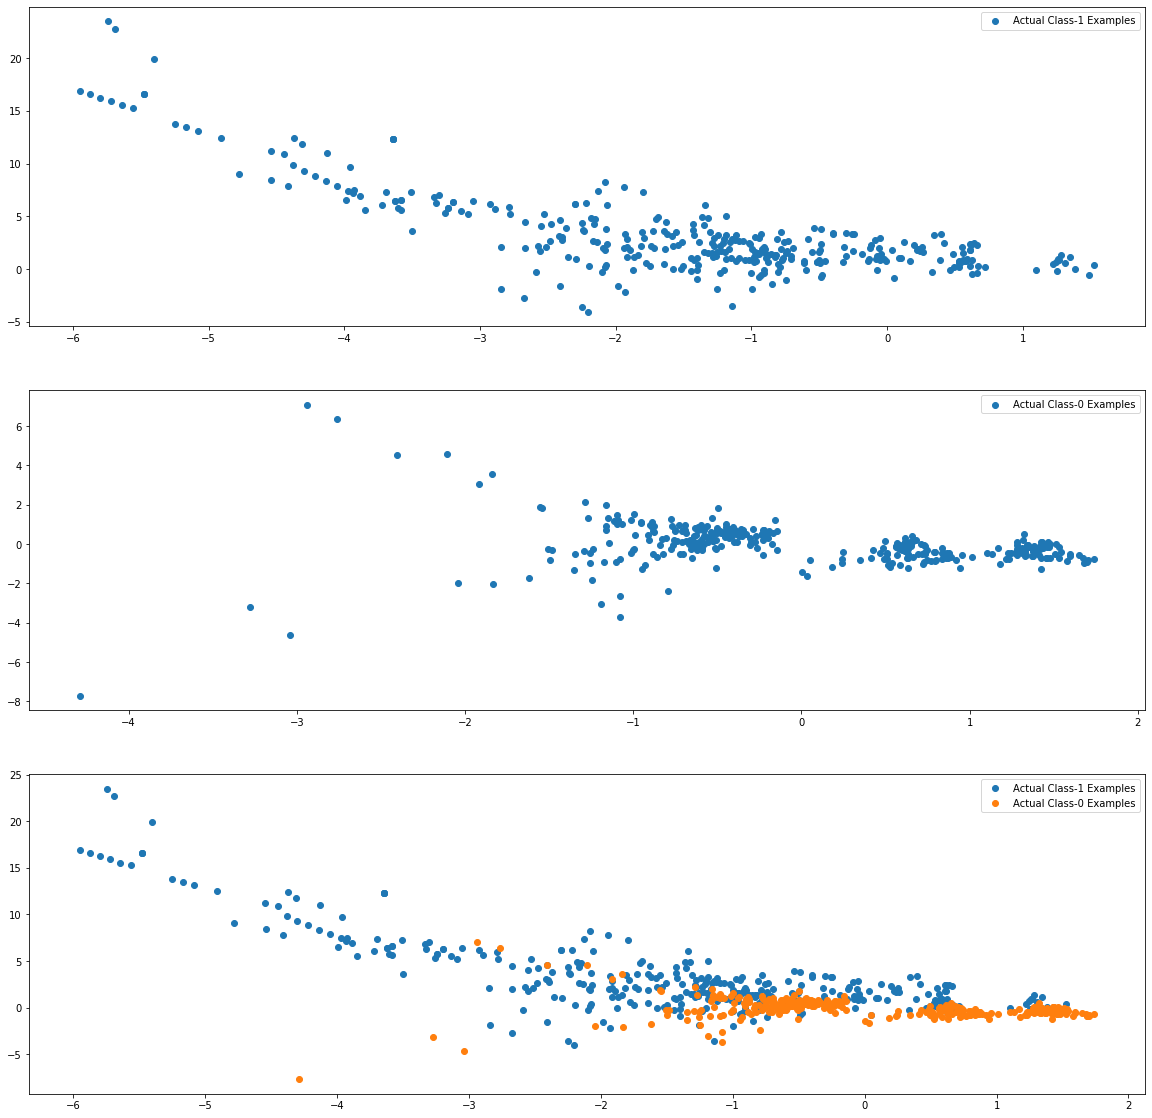

In [65]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = ada.fit_resample(X_test, y_test)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

### Logistic Regression

In [66]:
%%time

params = {"C": [0.01, 0.05, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_log_ada = GridSearchCV(estimator = LogisticRegression(random_state=42),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_log_ada.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result
print('Score for train: ', model_cv_log_ada.score(X_train_adasyn, y_train_adasyn))
print('Score for test: ', model_cv_log_ada.score(X_test_adasyn, y_test_adasyn))
print('Best ROC AUC score: ', model_cv_log_ada.best_score_)
print('Best hyperparameters: ', model_cv_log_ada.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Score for train:  0.9690322590744394
Score for test:  0.9057773226823068
Best ROC AUC score:  0.9690082640360387
Best hyperparameters:  {'C': 100}
CPU times: total: 9.17 s
Wall time: 43.8 s


In [67]:
# Instantiating the model with best estimator
log_reg_cv_ada = model_cv_log_ada.best_estimator_

# Fitting the model on train dataset
log_reg_cv_ada.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=100, random_state=42)

In [68]:
# Validation on Train
display_scores_train_bal(log_reg_cv_ada, X_train_adasyn, y_train_adasyn)

ROC AUC Score: 0.9690336405736989


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91    199020
           1       0.92      0.89      0.90    199010

    accuracy                           0.90    398030
   macro avg       0.90      0.90      0.90    398030
weighted avg       0.90      0.90      0.90    398030



In [69]:
# Validation on Test
display_scores_test_bal(log_reg_cv_sm, X_test_adasyn, y_test_adasyn)

ROC AUC Score: 0.9086888064047248


Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.98      0.81     85295
           1       0.96      0.58      0.72     85290

    accuracy                           0.78    170585
   macro avg       0.83      0.78      0.77    170585
weighted avg       0.83      0.78      0.77    170585



**Model Summary:**
* Train set
  * ROC : 96.90%
  * F1 Score for fraud class: 0.90
* Test set
  * ROC : 90.87%
  * F1 score for fraud class: 0.72

**Observations:**
1. Results have detoriated both for train and test when compared to both Random Oversampling as well as SMOTE.
2. It also seems that the model is overfitting.

### Decision Tree

**Parameter tuning**

##### Model 1

Tuning model on wide range of parameters.

In [35]:
%%time
params = {"criterion": ["gini", "entropy"], "max_depth": range(2,15,2), "min_samples_leaf": range(0,20001,2500)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt_ada = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt_ada.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result
print('Score for train: ', model_cv_dt_ada.score(X_train_adasyn, y_train_adasyn))
print('Score for test: ', model_cv_dt_ada.score(X_test_adasyn, y_test_adasyn))
print('Best ROC AUC score: ', model_cv_dt_ada.best_score_)
print('Best hyperparameters: ', model_cv_dt_ada.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Score for train:  0.9888196139400737
Score for test:  0.9565454868081047
Best ROC AUC score:  0.9869358472875177
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2500}
CPU times: total: 29.5 s
Wall time: 15min 54s


**Observations:**
1. Since max_depth is 14, we'll try 12 to 16 next.
2. We'll try min_samples_leaf less than in the range of 0 to 5000 as well, with step 150.
3. We'll take criterion as entropy

##### Model 2

In [37]:
%%time
params = {"max_depth": range(12,17), "min_samples_leaf": range(0,5001,150)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_dt_ada_2 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42, criterion="entropy"),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_dt_ada_2.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result
print('Score for train: ', model_cv_dt_ada_2.score(X_train_adasyn, y_train_adasyn))
print('Score for test: ', model_cv_dt_ada_2.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_dt_ada_2.best_score_)
print('Best hyperparameters: ', model_cv_dt_ada_2.best_params_)

Fitting 5 folds for each of 170 candidates, totalling 850 fits
Score for train:  0.9992881922333964
Score for test:  0.9174020054405775
Best ROC AUC score:  0.9984027999804012
Best hyperparameters:  {'max_depth': 16, 'min_samples_leaf': 150}
CPU times: total: 24.4 s
Wall time: 50min 36s


**Observations:**
* We have got our final parameters.
    1. max_depth is 16.
    2. min_samples_leaf is 150.
    3. criterion as `entropy`.

In [70]:
# Instantiating the model with best params
dt_cv_ada = DecisionTreeClassifier(random_state=42,
                                   criterion="entropy",
                                   max_depth=16,
                                   min_samples_leaf=150)

# Fitting the model on train dataset
dt_cv_ada.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=150,
                       random_state=42)

In [71]:
# Validation on Train
display_scores_train_bal(dt_cv_ada, X_train_adasyn, y_train_adasyn)

ROC AUC Score: 0.9992881922333964


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    199020
           1       0.98      0.99      0.99    199010

    accuracy                           0.99    398030
   macro avg       0.99      0.99      0.99    398030
weighted avg       0.99      0.99      0.99    398030



In [72]:
# Validation on Test
display_scores_test_bal(dt_cv_ada, X_test_adasyn, y_test_adasyn)

ROC AUC Score: 0.7957220485968531


Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.98      0.81     85295
           1       0.97      0.55      0.70     85290

    accuracy                           0.76    170585
   macro avg       0.82      0.76      0.75    170585
weighted avg       0.82      0.76      0.75    170585



**Model Summary:**
* Train set
  * ROC : 99.93%
  * F1 Score for fraud class: 0.99
* Test set
  * ROC : 79.58%
  * F1 Score for fraud class: 0.70

**Observations:**
1. Results have drastically detoriated for test.
2. Model is highly overfitting

### Random Forest

**Parameter tuning**

Since Random Forest itself takes a lot of time and computation to run, we'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters.

##### Model 1

Tuning model on wide range of parameters.

In [41]:
%%time
params = {"criterion": ["gini", "entropy"], "n_estimators": range(0,600,100),
          "max_depth": range(2,14,2), "min_samples_leaf": range(0,20000,2500)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf_ada = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, bootstrap=True),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 2,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_rf_ada.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result
print('Score for train: ', model_cv_rf_ada.score(X_train_adasyn, y_train_adasyn))
print('Score for test: ', model_cv_rf_ada.score(X_test_adasyn, y_test_adasyn))
print('Best ROC AUC score: ', model_cv_rf_ada.best_score_)
print('Best hyperparameters: ', model_cv_rf_ada.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.9950203279876226
Score for test:  0.9726557907928446
Best ROC AUC score:  0.9935992551212933
Best hyperparameters:  {'n_estimators': 400, 'min_samples_leaf': 2500, 'max_depth': 10, 'criterion': 'entropy'}
CPU times: total: 10min 13s
Wall time: 1h 18min 58s


**Observations:**
1. We'll keep the max_depth as 10.
2. min_samples_leaf is 2500, so we'll try it in the range of 0 to 5000, with step 100.
3. We'll keep the criterion as `entropy`.
4. n_estimators is 400, we'll try 300 to 500 with step 50.

##### Model 2

Fine tuning of parameters

In [42]:
%%time
params = {"n_estimators": range(300,501,50), "min_samples_leaf": range(0,5001,100)}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_rf_ada_2 = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=10, bootstrap=True),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 2,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_rf_ada_2.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result
print('Score for train: ', model_cv_rf_ada_2.score(X_train_adasyn, y_train_adasyn))
print('Score for test: ', model_cv_rf_ada_2.score(X_test_adasyn, y_test_adasyn))
print('Best ROC AUC score: ', model_cv_rf_ada_2.best_score_)
print('Best hyperparameters: ', model_cv_rf_ada_2.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score for train:  0.9973177813030496
Score for test:  0.9737031098746323
Best ROC AUC score:  0.9964319858389405
Best hyperparameters:  {'n_estimators': 500, 'min_samples_leaf': 1500}
CPU times: total: 16min 26s
Wall time: 2h 27min 59s


**Observations:**
* We have got our final parameters, we need not to tune the model more.
    1. `max_depth` is 10.
    2. `min_samples_leaf` is 1500.
    3. `n_estimators` is 500
    4. `criterion` is entropy

In [74]:
# Instantiating the model with best params
rf_cv_ada = RandomForestClassifier(random_state=42,
                                   criterion='entropy',
                                   bootstrap=True,
                                   max_depth=10,
                                   min_samples_leaf=1500,
                                   n_estimators=500)

# Fitting the model on train dataset
rf_cv_ada.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=1500,
                       n_estimators=500, random_state=42)

In [75]:
# Validation on Train
display_scores_train_bal(rf_cv_ada, X_train_adasyn, y_train_adasyn)

ROC AUC Score: 0.9973177813030496


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    199020
           1       0.97      0.99      0.98    199010

    accuracy                           0.98    398030
   macro avg       0.98      0.98      0.98    398030
weighted avg       0.98      0.98      0.98    398030



In [76]:
# Validation on Test
display_scores_test_bal(rf_cv_ada, X_test_adasyn, y_test_adasyn)

ROC AUC Score: 0.9262446149886336


Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.97      0.84     85295
           1       0.96      0.65      0.77     85290

    accuracy                           0.81    170585
   macro avg       0.85      0.81      0.80    170585
weighted avg       0.85      0.81      0.80    170585



**Model Summary:**
* Train set
  * ROC : 99.73%
  * F1 Score for fraud class: 0.98
* Test set
  * ROC : 92.62%
  * F1 score for fraud class: 0.77

**Observations:**
1. ROC is good for both train and test.
3. F1 score has dropped wrt test.

### XG Boost

**Parameter tuning**

We'll use RandomizedSearchCV instead of GridSearchCV in order to get best parameters for XGBoost as well.

##### Model 1

Tuning model on fine parameters.

In [18]:
%%time
params = {"n_estimators": range(10,500,10), "max_depth": range(2,15),
          "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], "min_child_weight": [1, 3, 5, 7],
          "gamma": [0.0, 0.1, 0.2, 0.3, 0.4], "colsample_bytree": [0.3, 0.4, 0.5, 0.7]}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform cross validation
model_cv_xgb_ada = RandomizedSearchCV(estimator = XGBClassifier(random_state=42, tree_method='gpu_hist'),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 10,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv_xgb_ada.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result
print('Score for train: ', model_cv_xgb_ada.score(X_train_adasyn, y_train_adasyn))
print('Score for test: ', model_cv_xgb_ada.score(X_test, y_test))
print('Best ROC AUC score: ', model_cv_xgb_ada.best_score_)
print('Best hyperparameters: ', model_cv_xgb_ada.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[18:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score for train:  1.0
Score for test:  0.9701270471479746
Best ROC AUC score:  0.9999926741992358
Best hyperparameters:  {'n_estimators': 120, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.7}
CPU times: total: 10.5 s
Wall time: 5min 46s


**Observations:**
* We need not to fine tune the model more, as we already did fine tuned it.
* So we'll go with the below paramters itself:
    * `n_estimators`: 120
    * `min_child_weight`: 1
    * `max_depth`: 10
    * `learning_rate`: 0.3
    * `gamma`: 0.0
    * `colsample_bytree`: 0.7

In [77]:
# Instantiating the model with best params
xgb_cv_ada = XGBClassifier(random_state=42,
                           tree_method='gpu_hist',
                           n_estimators=120,
                           min_child_weight=1,
                           max_depth=10,
                           learning_rate=0.3,
                           gamma=0.0,
                           colsample_bytree=0.7)

# Fitting the model on train dataset
xgb_cv_ada.fit(X_train_adasyn, y_train_adasyn)

[22:40:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [78]:
# Validation on Train
display_scores_train_bal(xgb_cv_ada, X_train_adasyn, y_train_adasyn)

ROC AUC Score: 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199010

    accuracy                           1.00    398030
   macro avg       1.00      1.00      1.00    398030
weighted avg       1.00      1.00      1.00    398030



In [79]:
# Validation on Test
display_scores_test_bal(xgb_cv_ada, X_test_adasyn, y_test_adasyn)

ROC AUC Score: 0.946817614033949


Classification Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80     85295
           1       1.00      0.51      0.68     85290

    accuracy                           0.76    170585
   macro avg       0.84      0.76      0.74    170585
weighted avg       0.84      0.76      0.74    170585



**Model Summary:**
* Train set
  * ROC : 100%
  * F1 Score for fraud class: 1.00
* Test set
  * ROC : 94.68%
  * F1 score for fraud class: 0.68

**Observations:**
1. ROC is good in both cases, but has dropped wrt previous models.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

**The best model is the XGBoost model, with SMOTE class balancing algorithm.**
1. It has the best ROC as well as the F1 score.
2. Also, the recall and precision is also better than others and so the model will be ideal for all small, medium as well as big multinational banks.

Performing the best oversampling method on X_train & y_train

In [80]:
# Instantiating the model with best params
xgb_cv_sm_2 = XGBClassifier(random_state=42,
                          tree_method='gpu_hist',
                          n_estimators=460,
                          min_child_weight=5,
                          max_depth=6,
                          learning_rate=0.15,
                          gamma=0.4,
                          colsample_bytree=0.4)

# Fitting the model on train dataset
xgb_cv_sm_2.fit(X_train, y_train)

[22:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=460, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [92]:
# Validation on Train
display_scores_train_bal(xgb_cv_sm_2, X_train, y_train)

ROC AUC Score: 0.9999888552745663


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      0.92      0.96       344

    accuracy                           1.00    199364
   macro avg       1.00      0.96      0.98    199364
weighted avg       1.00      1.00      1.00    199364



In [91]:
# Validation on Test
display_scores_test_bal(xgb_cv_sm_2, X_test, y_test)

ROC AUC Score: 0.9765396881728436


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



**Observations:**
1. ROC is good in both cases.
2. F1 score is also good in case of train data and decent in case of test data.

### Print the important features of the best model to understand the dataset

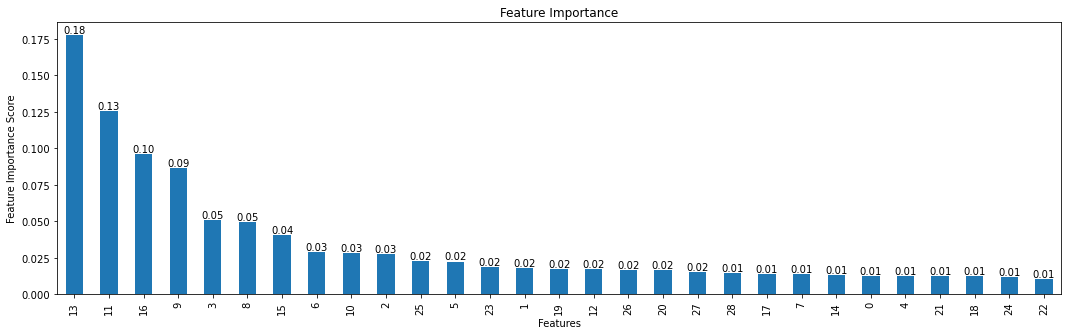

In [81]:
plt.figure(figsize=(18,5))
feat_imp = pd.Series(xgb_cv_sm_2.feature_importances_).sort_values(ascending=False)
f_imp = feat_imp.plot(kind='bar', title='Feature Importance')
for bar in f_imp.patches:
    f_imp.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=10, xytext=(0, 5), textcoords='offset points')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.show()

Top var = 13
2nd Top var = 11
3rd Top var = 16


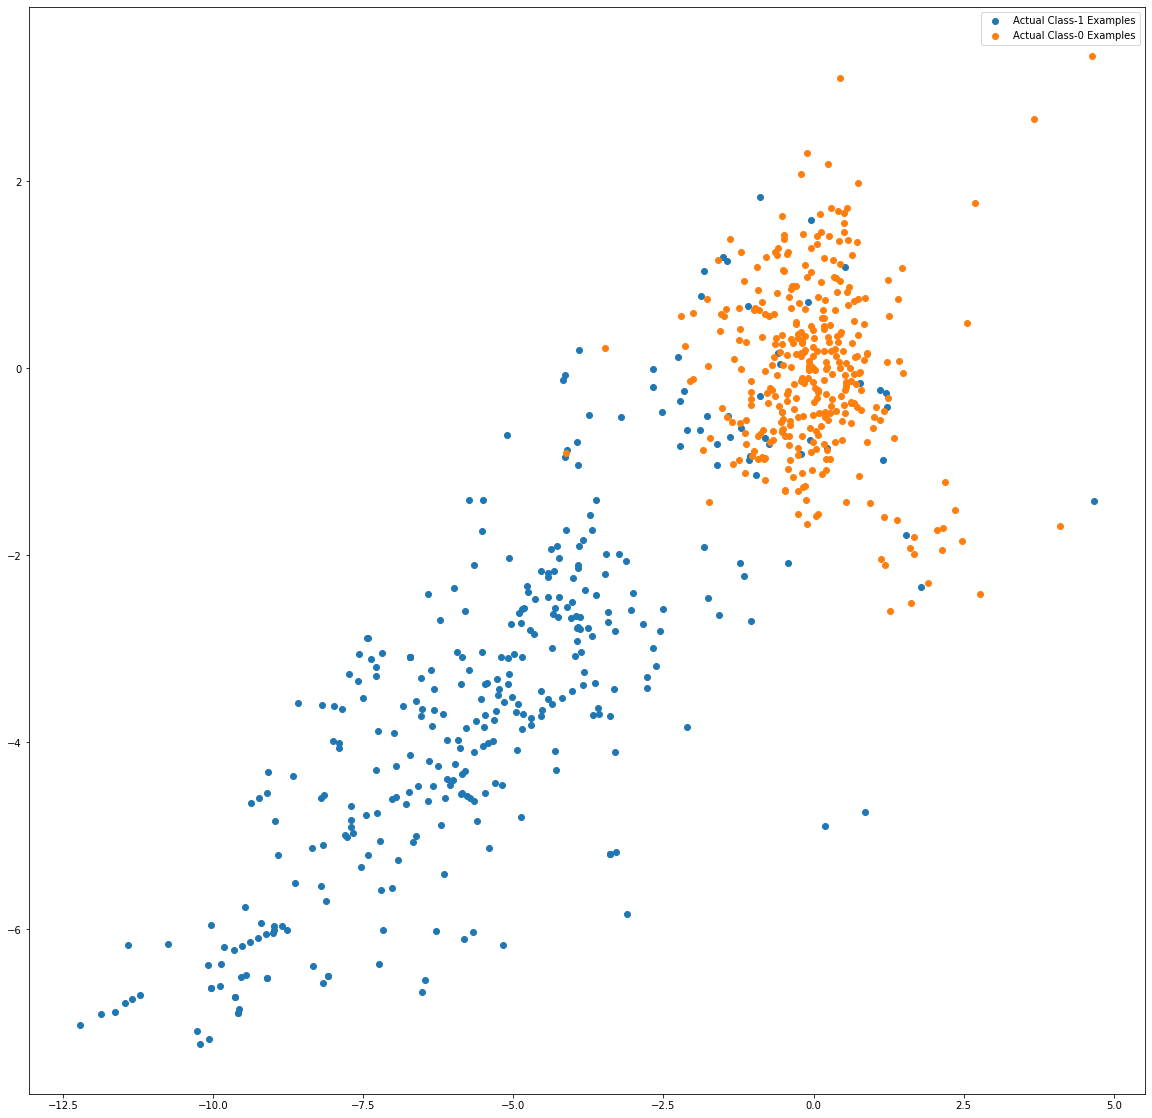

In [82]:
var_imp = []
for i in xgb_cv_sm_2.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_cv_sm_2.feature_importances_)[-1]))
print('2nd Top var =', var_imp.index(np.sort(xgb_cv_sm_2.feature_importances_)[-2]))
print('3rd Top var =', var_imp.index(np.sort(xgb_cv_sm_2.feature_importances_)[-3]))

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_cv_sm_2.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_cv_sm_2.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [90]:
print('Train auc =', metrics.roc_auc_score(y_train, xgb_cv_sm_2.predict_proba(X_train)[:,1]))
print('Test auc =', metrics.roc_auc_score(y_test, xgb_cv_sm_2.predict_proba(X_test)[:,1]))

# ROC-AUC Train
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, xgb_cv_sm_2.predict_proba(X_train)[:,1])
thresholds_train = thresholds_train[np.argmax(tpr_train-fpr_train)]
print("AUC threshold for train is:",thresholds_train)

# ROC-AUC Test
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, xgb_cv_sm_2.predict_proba(X_test)[:,1])
thresholds_test = thresholds_test[np.argmax(tpr_test-fpr_test)]
print("AUC threshold for train is:",thresholds_test)

Train auc = 0.9999888552745663
Test auc = 0.9765396881728436
AUC threshold for train is: 0.0143469395
AUC threshold for train is: 0.0015946933


##### ROC-AUC Curve for Train

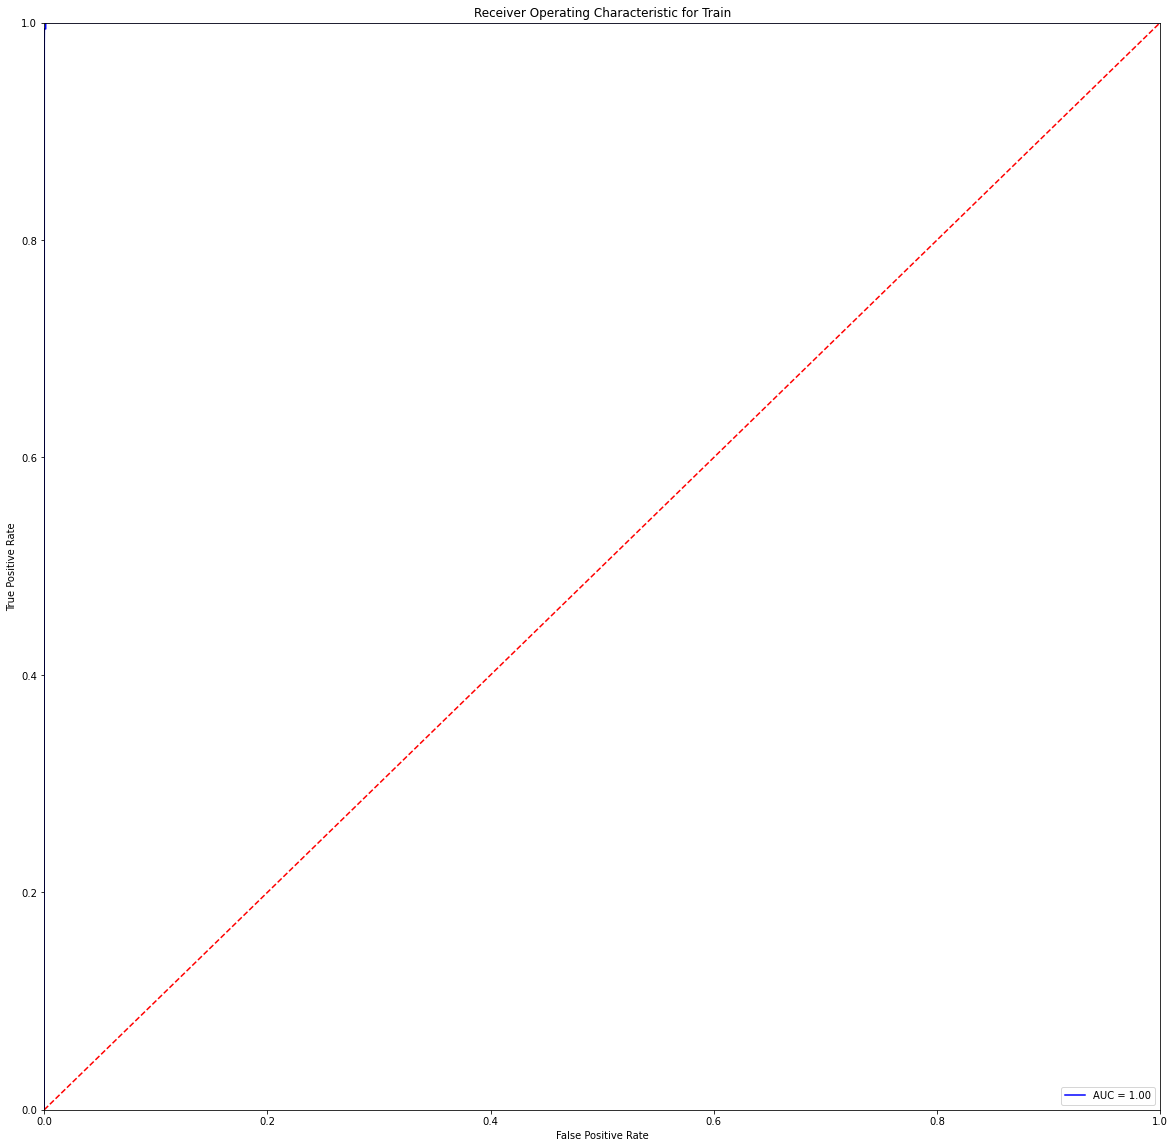

In [84]:
plt.title('Receiver Operating Characteristic for Train')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr_train, tpr_train))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### ROC-AUC Curve for Test

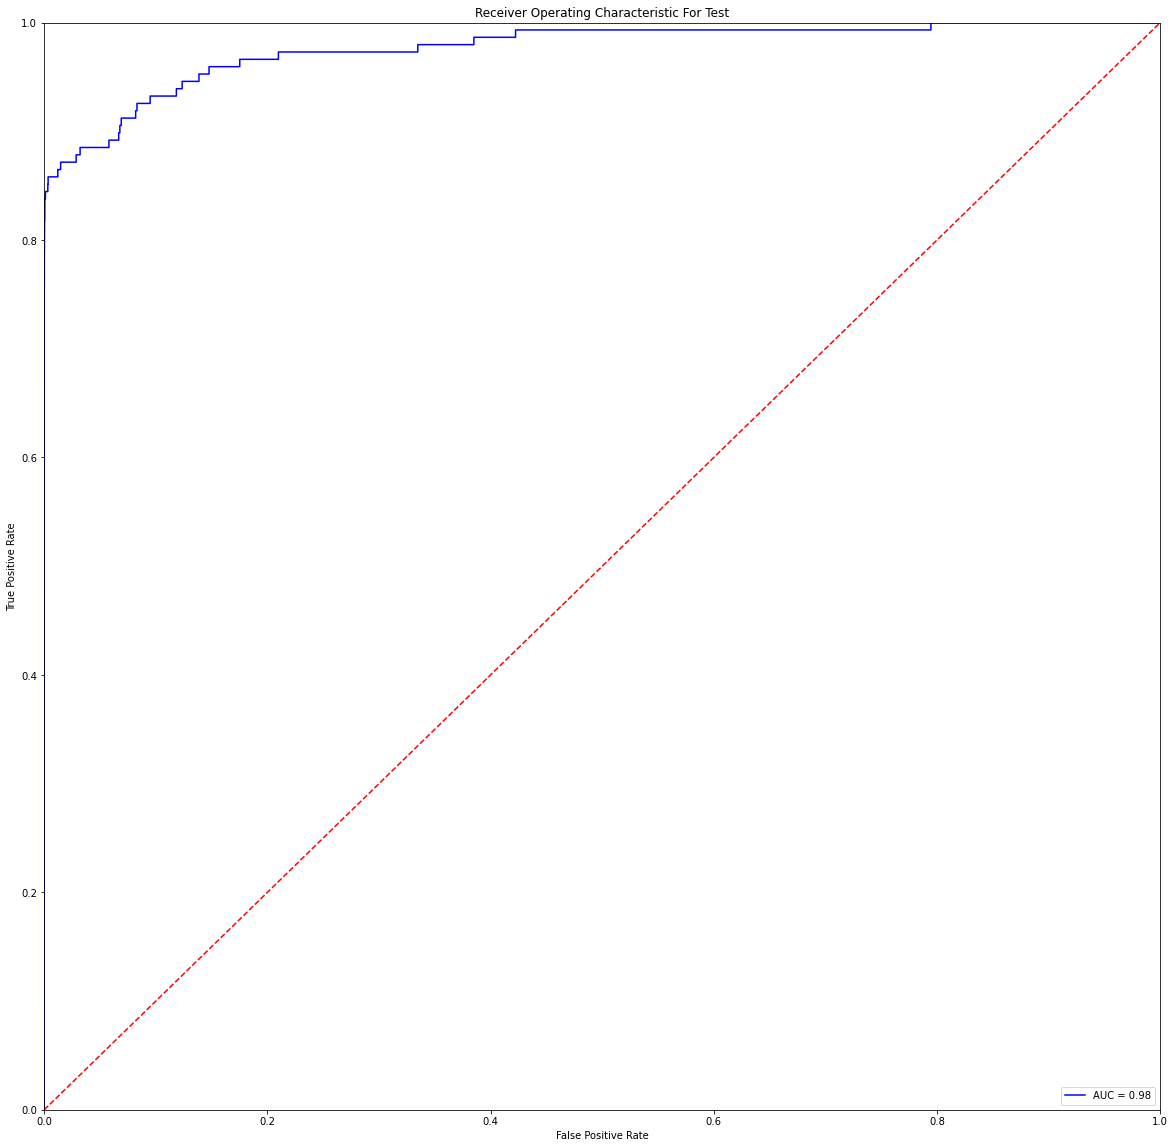

In [85]:
plt.title('Receiver Operating Characteristic For Test')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr_test, tpr_test))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Final Conclusion

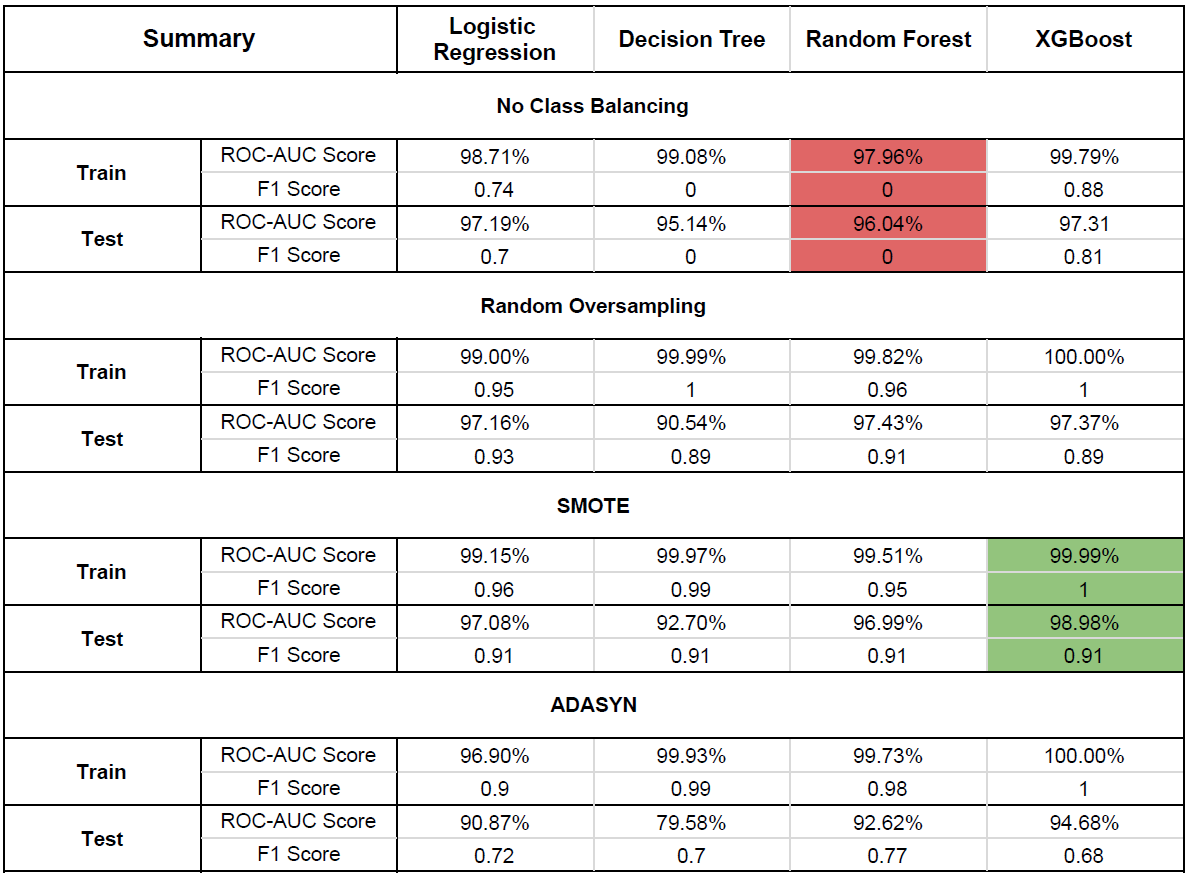

**Note:**  
Green is the best model,  Red is the worst model

Variable V13, V11 and V16 are the top 3 important variables (in that order).

**All the important variables with their importance are shown below:**

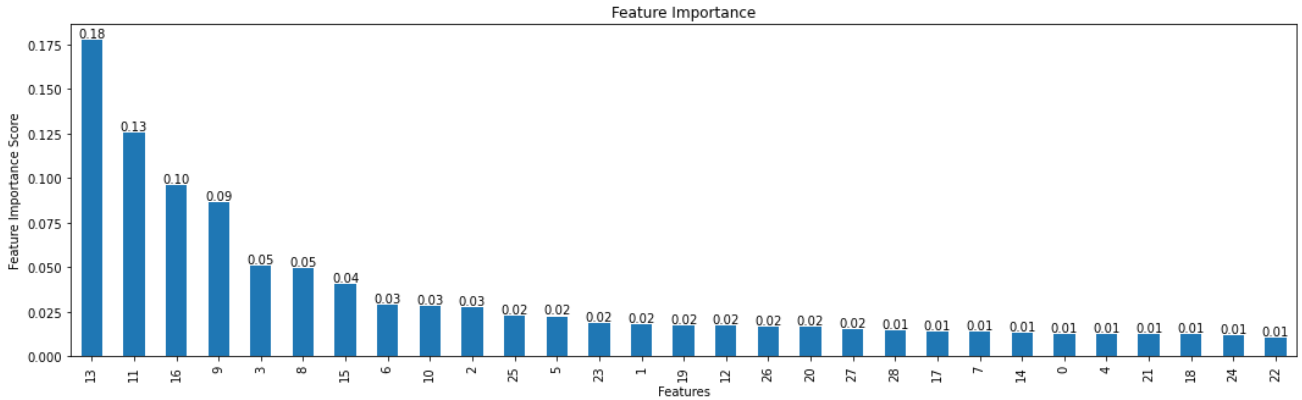